<a id='top'></a>
# Pima Indians Diabetes Database
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. 
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.
The datasets consists of several medical predictor variables and one target variable, Outcome. 
Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
## Table of Contents
1. [Data Understanding and Manipulation](#dum) 
    1. [Data semantics](#ds)
    2. [Distribution of the variables and statistics](#dvs)
    3. [Assessing data quality](#adq)
2. [Clustering](#clu)
    1. [Normalization](#norm)
    2. [KMeans](#km)
    3. [DBScan](#dbs)
    4. [Hierarchical](#hie)
3. [Pattern Mining]
4. [Classification](#cla)

<a id='dum'></a>
## Data Understanding and Manipulation([to top](#top))

<a id='ds'></a>
### Data semantics
Dataset attributi:
<ul>
    <li>Pregnancies: Numero di gravidanze</li>
    <li>Glucose: Concentrazione di glucosio nel plasma a 2 ore in un test di tolleranza al glucosio per via orale</li>
    <i>(Valori normali sotto ai 140 mg/dl, tra 140-199 possibile tendenza allo sviluppo del diabete)</i>
    <li>BloodPressure: Pressione sanguigna diastolica ($mm Hg$)</li>
    <i>(Minima compresa tra 75 e 85 mmHg)</i>
    <li>SkinThickness: Spessore della piega della pelle dei tricipiti ($mm$)</li>
    <i>(Normale è 23mm)</i>
    <li>Insulin: 2 ore di insulina sierica ($mu\frac{U}{ml}$)</li>
    <i>(Valori normali tra 16-166 mIU/L)</i>
    <li>BMI: Body mass index ($\frac{kg}{m^{2}}$) </li>
    <i>(Peso diviso altezza al quadrato, tra 18.5 to 25 è normale)</i>
    <li>DiabetesPedigreeFunction: Ereditarietà del diabete</li>
    <i>(Non è spiegato come è stato calcolato, valori più alti indicano presenza di parenti che hanno sviluppato il diabete)
    <li>Age: Età ($anni$)</li>
    <i>(Donne tra 21 e 81)</i>
    <li>Outcome:Variabile della classe (0 il paziente è sano - 1 il paziente è malato)</li>
</ul>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../DMML/Data/diabetes.csv")

In [3]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Il nostro dataset è composto da 768 record e 9 attributi. 
Non sono presenti attributi categorici, a parte 'Outcome', che è stato già codificato.
Ad un primo sguardo sembra non esserci valori nulli.

<a id='dvs'></a>
### Distribution of the variables and statistics 

In [9]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In questo dataset non ci sono record NaN ma i seguenti attributi:

* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
presentano valore minimo pari a 0.

Questo può essere interpretato come un valore mancante per quel particolare record, perchè per nessuno di questi attributi ha senso fisico una registrazione pari a 0.

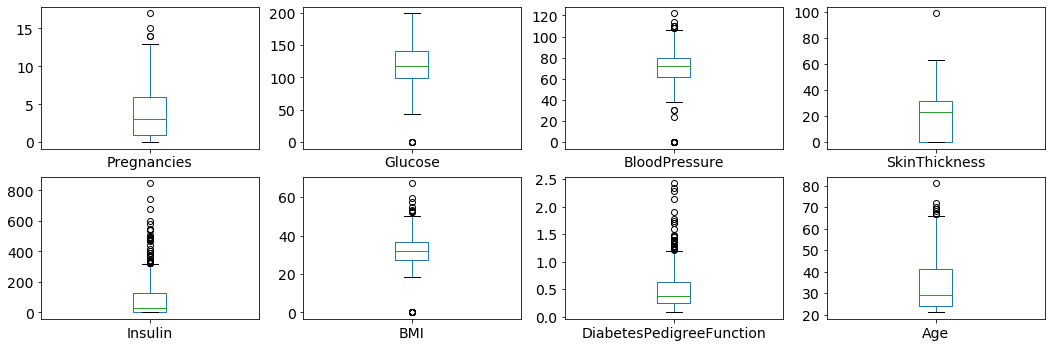

In [3]:
columns = [col for col in df.columns if col != 'Outcome']
df[columns].plot(kind= 'box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=14,figsize=(18,12))
plt.show()

<a id='adq'></a>
### Assessing data quality (missing values, outliers)

Sostituzione valori 0 con NaN

In [4]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [6]:
(df.isnull().sum() / len(df)) * 100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

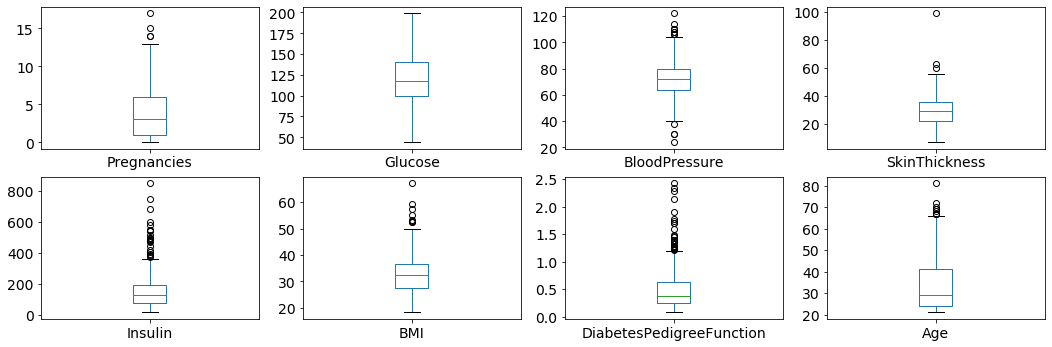

In [5]:
df[columns].plot(kind= 'box', subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=14,figsize=(18,12))
plt.show()

**Pregnancies**

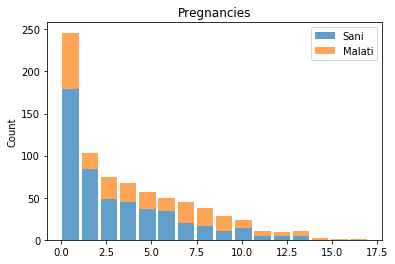

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [6]:
df1 = df[df['Outcome'] == 0]['Pregnancies']
df2 = df[df['Outcome'] == 1]['Pregnancies']

plt.hist([df1, df2], bins='auto', stacked=True, alpha=0.7, rwidth=0.85)
plt.ylabel('Count') 
plt.title('Pregnancies')
plt.legend(('Sani', 'Malati'), loc='best')
plt.show()
df['Pregnancies'].describe()

**DiabetesPedigreeFunction**

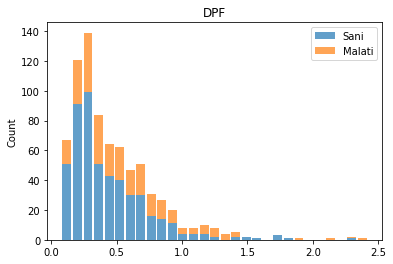

Median:  0.3725


count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

In [7]:
df1 = df[df['Outcome'] == 0]['DiabetesPedigreeFunction']
df2 = df[df['Outcome'] == 1]['DiabetesPedigreeFunction']

plt.hist([df1, df2], bins='auto', stacked=True, alpha=0.7, rwidth=0.85)
plt.ylabel('Count') 
plt.title('DPF')
plt.legend(('Sani', 'Malati'), loc='best')
plt.show()
print('Median: ', df['DiabetesPedigreeFunction'].median())
df['DiabetesPedigreeFunction'].describe()

**Age**

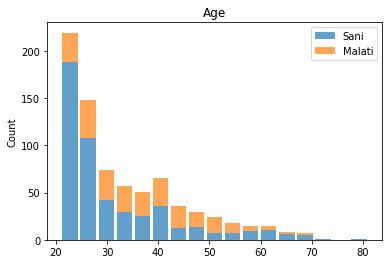

Median:  29.0


count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [8]:
df1 = df[df['Outcome'] == 0]['Age']
df2 = df[df['Outcome'] == 1]['Age']

plt.hist([df1, df2], bins='auto', stacked=True, alpha=0.7, rwidth=0.85)
plt.ylabel('Count') 
plt.title('Age')
plt.legend(('Sani', 'Malati'), loc='best')
plt.show()
print('Median: ', df['Age'].median())
df['Age'].describe()

In [5]:
def to_plot(col1, col2):
    fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15, 5)) 
    ax = ax.ravel()
    for idx, c in enumerate([col1, col2]): 
        df1 = df[df['Outcome'] == 0][c]
        df2 = df[df['Outcome'] == 1][c]
        
        #ax[idx].hist(df[c], bins='auto', alpha=0.7, rwidth=0.85) 
        ax[idx].hist([df1, df2], bins='auto', stacked=True, alpha=0.7, rwidth=0.85) 
        ax[idx].set_ylabel('Count') 
        ax[idx].set_title(c)

In [10]:
# fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
# for i, (name, col) in enumerate(df2.iteritems()):
#     r, c = i // n, i % n
#     ax = axes[r, c]
#     col.hist(ax=ax)
#     ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
#     ax2.set_ylim(0)
 
# fig.tight_layout()

**Glucose**
<p>I valori di 'Glucose' mancanti sono lo 0.65%, decidiamo di sostituirli con la media in quanto non sono presenti outlier.</p>

In [6]:
df['Glucose_mod'] = df['Glucose'].fillna(np.mean(df['Glucose'][df['Glucose'].isnull() == False]) )

C:\Users\Giulia\Anaconda3\envs\DMML\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\Giulia\Anaconda3\envs\DMML\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)


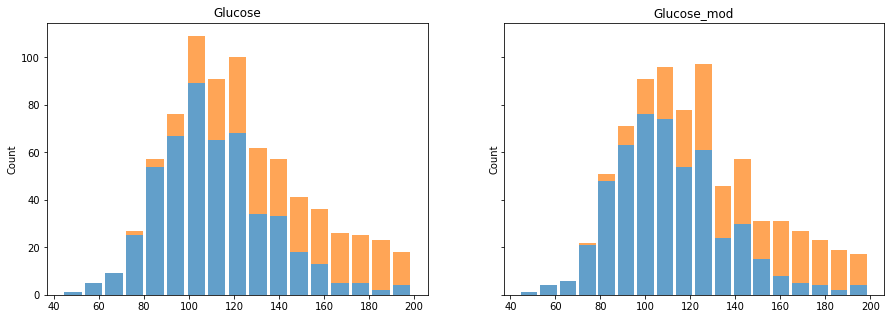

Glucose  Glucose_mod
count  763.000000   768.000000
mean   121.686763   121.686763
std     30.535641    30.435949
min     44.000000    44.000000
25%     99.000000    99.750000
50%    117.000000   117.000000
75%    141.000000   140.250000
max    199.000000   199.000000

In [7]:
cols = ['Glucose', 'Glucose_mod']
to_plot('Glucose', 'Glucose_mod')
plt.show()
print()
df[cols].describe()

**BMI**
<p>I valori di 'BMI' mancanti sono l'1.43%, decidiamo di sostituirli con la mediana in quanto l'attributo presenta alcuni outlier.</p>

In [8]:
df['BMI_mod'] = df['BMI'].fillna(np.median(df['BMI'][df['BMI'].isnull() == False]))

C:\Users\Giulia\Anaconda3\envs\DMML\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\Giulia\Anaconda3\envs\DMML\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)


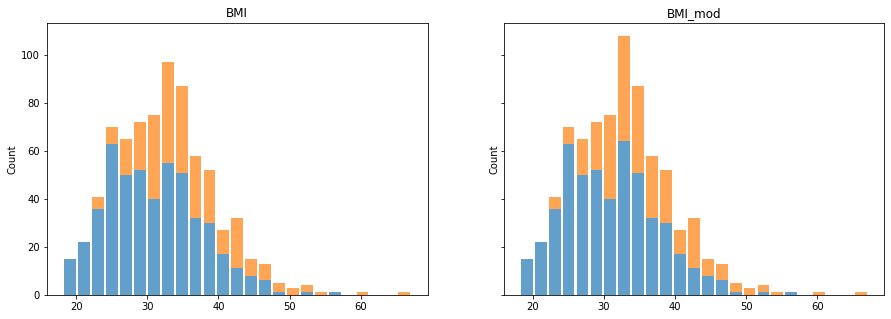

BMI     BMI_mod
count  757.000000  768.000000
mean    32.457464   32.455208
std      6.924988    6.875177
min     18.200000   18.200000
25%     27.500000   27.500000
50%     32.300000   32.300000
75%     36.600000   36.600000
max     67.100000   67.100000

In [9]:
cols = ['BMI', 'BMI_mod']
to_plot('BMI', 'BMI_mod')
plt.show()
print()
df[cols].describe()

**BloodPressure**
<p>I valori di 'BloodPressure' mancanti sono il 4.56%, decidiamo di sostituirli con la mediana in quanto l'attributo presenta alcuni outlier.</p>

In [10]:
df['BloodPressure_mod'] = df['BloodPressure'] \
                                  .fillna(np.median(df['BloodPressure'][df['BloodPressure'].isnull() == False]))

C:\Users\Giulia\Anaconda3\envs\DMML\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\Giulia\Anaconda3\envs\DMML\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)


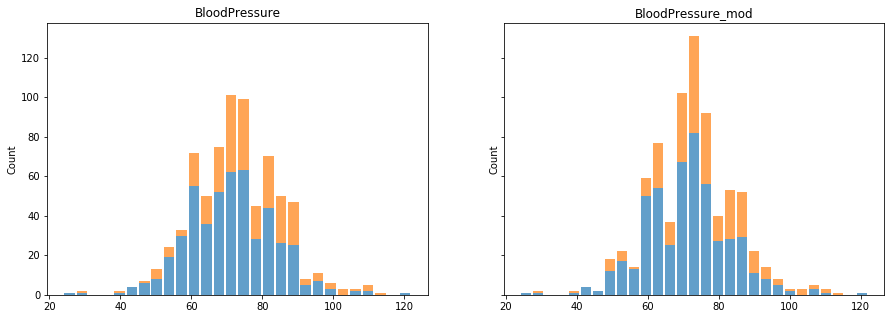

BloodPressure  BloodPressure_mod
count     733.000000         768.000000
mean       72.405184          72.386719
std        12.382158          12.096642
min        24.000000          24.000000
25%        64.000000          64.000000
50%        72.000000          72.000000
75%        80.000000          80.000000
max       122.000000         122.000000

In [11]:
cols = ['BloodPressure', 'BloodPressure_mod']
to_plot('BloodPressure', 'BloodPressure_mod')
plt.show()
df[cols].describe()

**SkinThickness**
<p>I valori di 'SkinThickness' mancanti sono il 29.56%, decidiamo di sostituirli con valori mediani di 'SkinThickness' raggruppati per 'BMI', in quanto abbiamo osservato un'alta correlazione tra i due attributi.</p>

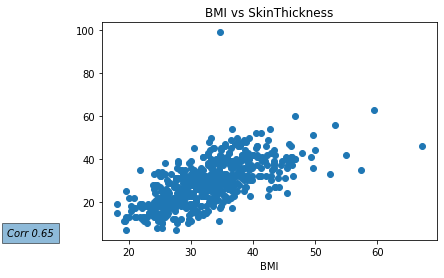

In [12]:
c = df[['BMI', 'SkinThickness']].corr()
c = round(c['BMI']['SkinThickness'], 2)

plt.scatter(df['BMI_mod'], df['SkinThickness'])
plt.title('BMI vs SkinThickness')
plt.xlabel('BMI')
plt.text(8, 8, 'Corr %s' % c, style='italic',
        bbox={ 'alpha': 0.5, 'pad': 5}, horizontalalignment='right', verticalalignment='top')
plt.show()

In [13]:
min_BMI = min(df['BMI_mod'])
max_BMI = max(df['BMI_mod'])
bins = [min_BMI-1, 25, 30, 35, 40, max_BMI+1]
labels = [0, 1, 2, 3, 4]
df['BMI_mod_bin'] = pd.cut(x=df['BMI_mod'], bins=bins, labels=labels)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Glucose_mod  BMI_mod  \
0                     0.627   50        1        148.0     33.6   
1                     0.351   31        0         85.0     26.6   
2                     0.672   32        1        183.0     23.3   
3                     0.167   21        0         89.0     28.1   
4                     2.288   33        1        137.0     43.1   

   BloodPressure_mod BMI_mod_bin  
0               72.0           2  
1               66.0           1  
2               64.0           0  
3               66.0           1  
4               40.0           4

In [14]:
df['SkinThickness_mod'] = df['SkinThickness'].groupby(df['BMI_mod_bin']).apply(lambda x: x.fillna(x.median()))

Qui sotto riportiamo il confronto tra la distribuzione della popolazione di SkinThickness di partenza e qualla con i valori sostituiti. Si può osservare che abbiamo rispettato la distribuzione iniziale.

In [20]:
# riga attributo 
# colonne attributo nome. attributo nome_fill_

def hist_plt(df,n_bins):
    
    # lista attributi non modificati
    not_modified_attr = [n for n in df.columns if 'mod' not in n]
    # lista attributi modificati
    modified_attr = [n for n in df.columns if 'mod' in n]
    
    n_rows = len(not_modified_attr)
    n_cols = 2 # attributo originale, attributo modificato
    
    fig = plt.figure(figsize=(n_cols*8, n_rows*5))
    fig_dims = (n_rows, n_cols)
    
    
    for row, nm_attr in enumerate(not_modified_attr):
        
        axis_list = [0]*n_cols
        max_list = [0]*n_cols
        bins = 0
        
        for col in range(n_cols):
            
            axis_list[col] = plt.subplot2grid(fig_dims, (row, col))
            
            if col == 0:
                # definisco gli intervalli di valori dei bins a partire da un numero di bins stabilito 
                count, bins = np.histogram(df[nm_attr].dropna(), bins=n_bins)
                df[nm_attr].hist(bins=bins)
                max_list[col] =plt.ylim()[1]
                plt.title('Original Dataset', fontsize=14)
                plt.ylabel(nm_attr, fontsize=14)
                
                if row == 0:
                    index_modified_attr = 0
                else:
                    index_modified_attr += 1
                
                
            else:
                
                m_attr = modified_attr[index_modified_attr]
                
                
                df[m_attr].hist(bins=bins)
                max_list[col] =plt.ylim()[1]
                plt.title('Filled Datas', fontsize=14)
                plt.ylabel(m_attr, fontsize=14)
                
        m = max(max_list)
        
        for ax in axis_list:
            ax.set_ylim(0,m)

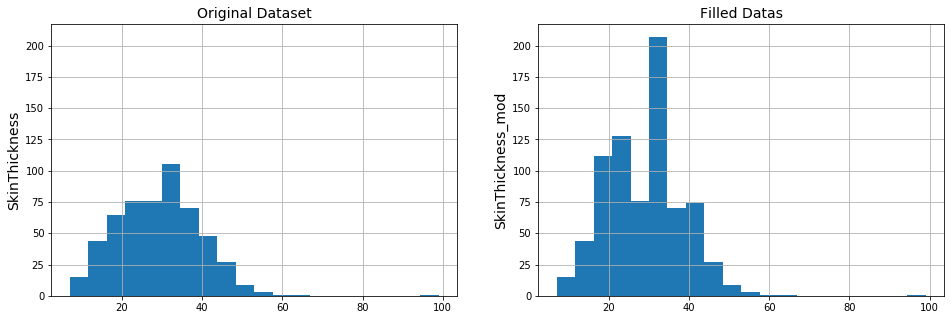

In [21]:
n_bins = 20
lista_attributi = ['SkinThickness', 'SkinThickness_mod']
hist_plt(df[lista_attributi], n_bins)

**Insulin**
<p>I valori di 'Insulin' mancanti sono il 48.70%, ma essendo un valore fondamentale per la predizione non possiamo eliminarlo.
Abbiamo deciso di dividere la variabile relativa al “test di tolleranza al Glucosio” in tre gruppi come evidenziato da wikepedia. Da 0 a 140 si rientra in un profilo glicemico normale, da 140 a 200 c’è una ridotta tolleranza al glucosio e oltre i 200 si è affetti da “diabete mellito”. Raggruppando per i 3 gruppi abbiamo sostituito i valori Nan di Insulina con la mediana relativa a ciascun gruppo.</p>

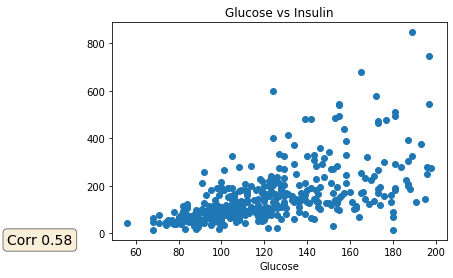

In [15]:
c = df[['Glucose_mod', 'Insulin']].corr()
c = round(c['Glucose_mod']['Insulin'], 2)

plt.scatter(df['Glucose_mod'], df['Insulin'])
plt.title('Glucose vs Insulin')
plt.xlabel('Glucose')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, 'Corr %s' % c, fontsize=14,
        verticalalignment='top', bbox=props)
plt.show()

In [16]:
min_glucose = min(df['Glucose_mod'])
max_glucose = max(df['Glucose_mod'])
bins1 = [min_glucose-1, 140, max_glucose+1]
labels1 = [1, 2]

df["binned_Glucose_mod"]= pd.cut(df['Glucose_mod'], bins=bins1, labels=labels1)
#df["Insulin_mod"]= df['Insulin'].groupby(df["binned_Glucose_mod"])\
#                                 .fillna(np.median(df['Insulin'][df['Insulin'].isnull() == False]))

df["Insulin_mod"]= df['Insulin'].groupby(df["binned_Glucose_mod"])\
                                 .apply(lambda x: x.fillna(x.median()))

C:\Users\Giulia\Anaconda3\envs\DMML\lib\site-packages\numpy\lib\histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\Giulia\Anaconda3\envs\DMML\lib\site-packages\numpy\lib\histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)


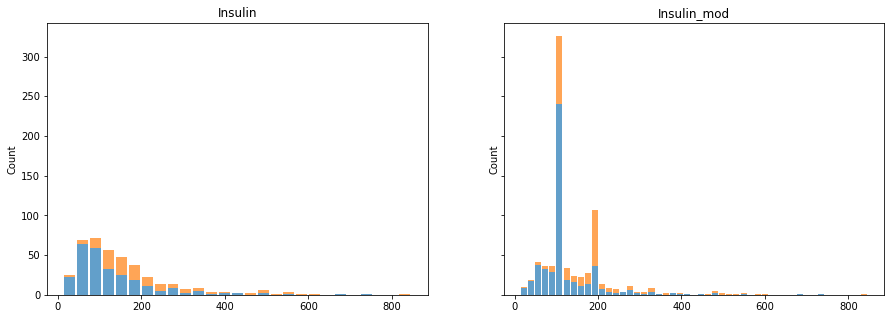

Insulin  Insulin_mod
count  394.000000   768.000000
mean   155.548223   141.014323
std    118.775855    90.226810
min     14.000000    14.000000
25%     76.250000   105.000000
50%    125.000000   105.000000
75%    190.000000   183.250000
max    846.000000   846.000000

In [17]:
cols = ['Insulin', 'Insulin_mod']
to_plot('Insulin', 'Insulin_mod')
plt.show()
df[cols].describe()

In [18]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns:
    df[col] = df[col+'_mod']
    df.drop(col+'_mod', axis=1, inplace=True)

df.drop(['BMI_mod_bin', 'binned_Glucose_mod'], axis=1, inplace=True)   

df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    194.0  33.6   
1            1     85.0           66.0           29.0    105.0  26.6   
2            8    183.0           64.0           17.0    194.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [19]:
# Eliminazione degli outlier per Insulina
df = df[(df['Insulin'] < 600)]

In [23]:
df.shape

(764, 9)

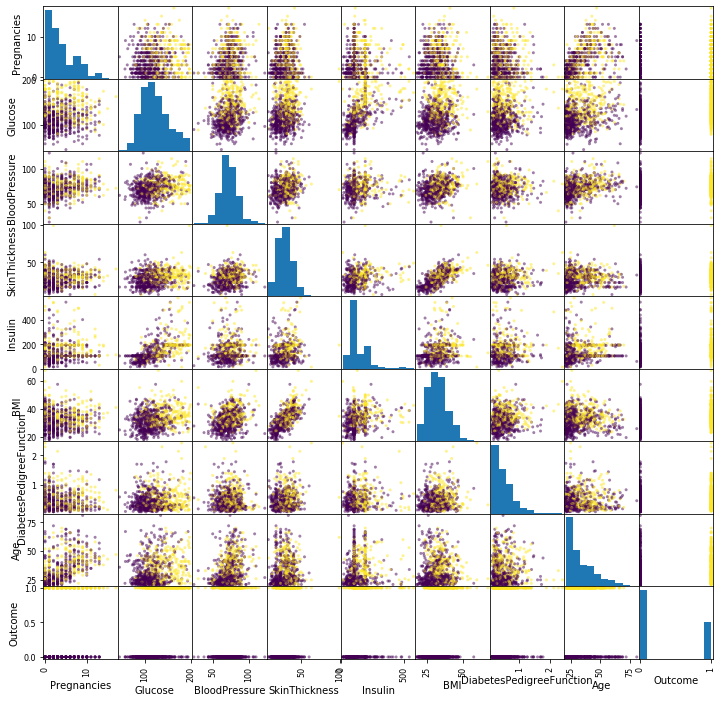

In [20]:
pd.plotting.scatter_matrix(df, c=df['Outcome'], figsize=(12,12))
plt.show()

In [21]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   764.000000  764.000000     764.000000     764.000000  764.000000   
mean      3.848168  121.440358      72.378272      28.611257  137.996073   
std       3.370597   30.253997      12.102212       9.669983   79.935451   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000  105.000000   
50%       3.000000  117.000000      72.000000      30.000000  105.000000   
75%       6.000000  140.000000      80.000000      34.000000  182.000000   
max      17.000000  199.000000     122.000000      99.000000  579.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  764.000000                764.000000  764.000000  764.000000  
mean    32.431675                  0.469319   33.198953    0.348168  
std      6.851992                  0.325203   11.728233    0.476702  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.242500   24.000000    0.000000  
50%     32.300000                  0.370000   29.000000    0.000000  
75%     36.525000                  0.624500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [22]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.133652       0.210123       0.077221   
Glucose                      0.133652  1.000000       0.221784       0.213688   
BloodPressure                0.210123  0.221784       1.000000       0.211886   
SkinThickness                0.077221  0.213688       0.211886       1.000000   
Insulin                      0.043427  0.576255       0.089382       0.199449   
BMI                          0.026540  0.228102       0.277944       0.711441   
DiabetesPedigreeFunction    -0.036186  0.123377      -0.001265       0.124481   
Age                          0.547077  0.265945       0.331293       0.094450   
Outcome                      0.221366  0.498382       0.169106       0.270643   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.043427  0.026540                 -0.036186   
Glucose                   0.576255  0.228102                  0.123377   
BloodPressure             0.089382  0.277944                 -0.001265   
SkinThickness             0.199449  0.711441                  0.124481   
Insulin                   1.000000  0.228504                  0.101088   
BMI                       0.228504  1.000000                  0.153912   
DiabetesPedigreeFunction  0.101088  0.153912                  1.000000   
Age                       0.128237  0.031484                  0.034978   
Outcome                   0.300782  0.319864                  0.182696   

                               Age   Outcome  
Pregnancies               0.547077  0.221366  
Glucose                   0.265945  0.498382  
BloodPressure             0.331293  0.169106  
SkinThickness             0.094450  0.270643  
Insulin                   0.128237  0.300782  
BMI                       0.031484  0.319864  
DiabetesPedigreeFunction  0.034978  0.182696  
Age                       1.000000  0.232564  
Outcome                   0.232564  1.000000

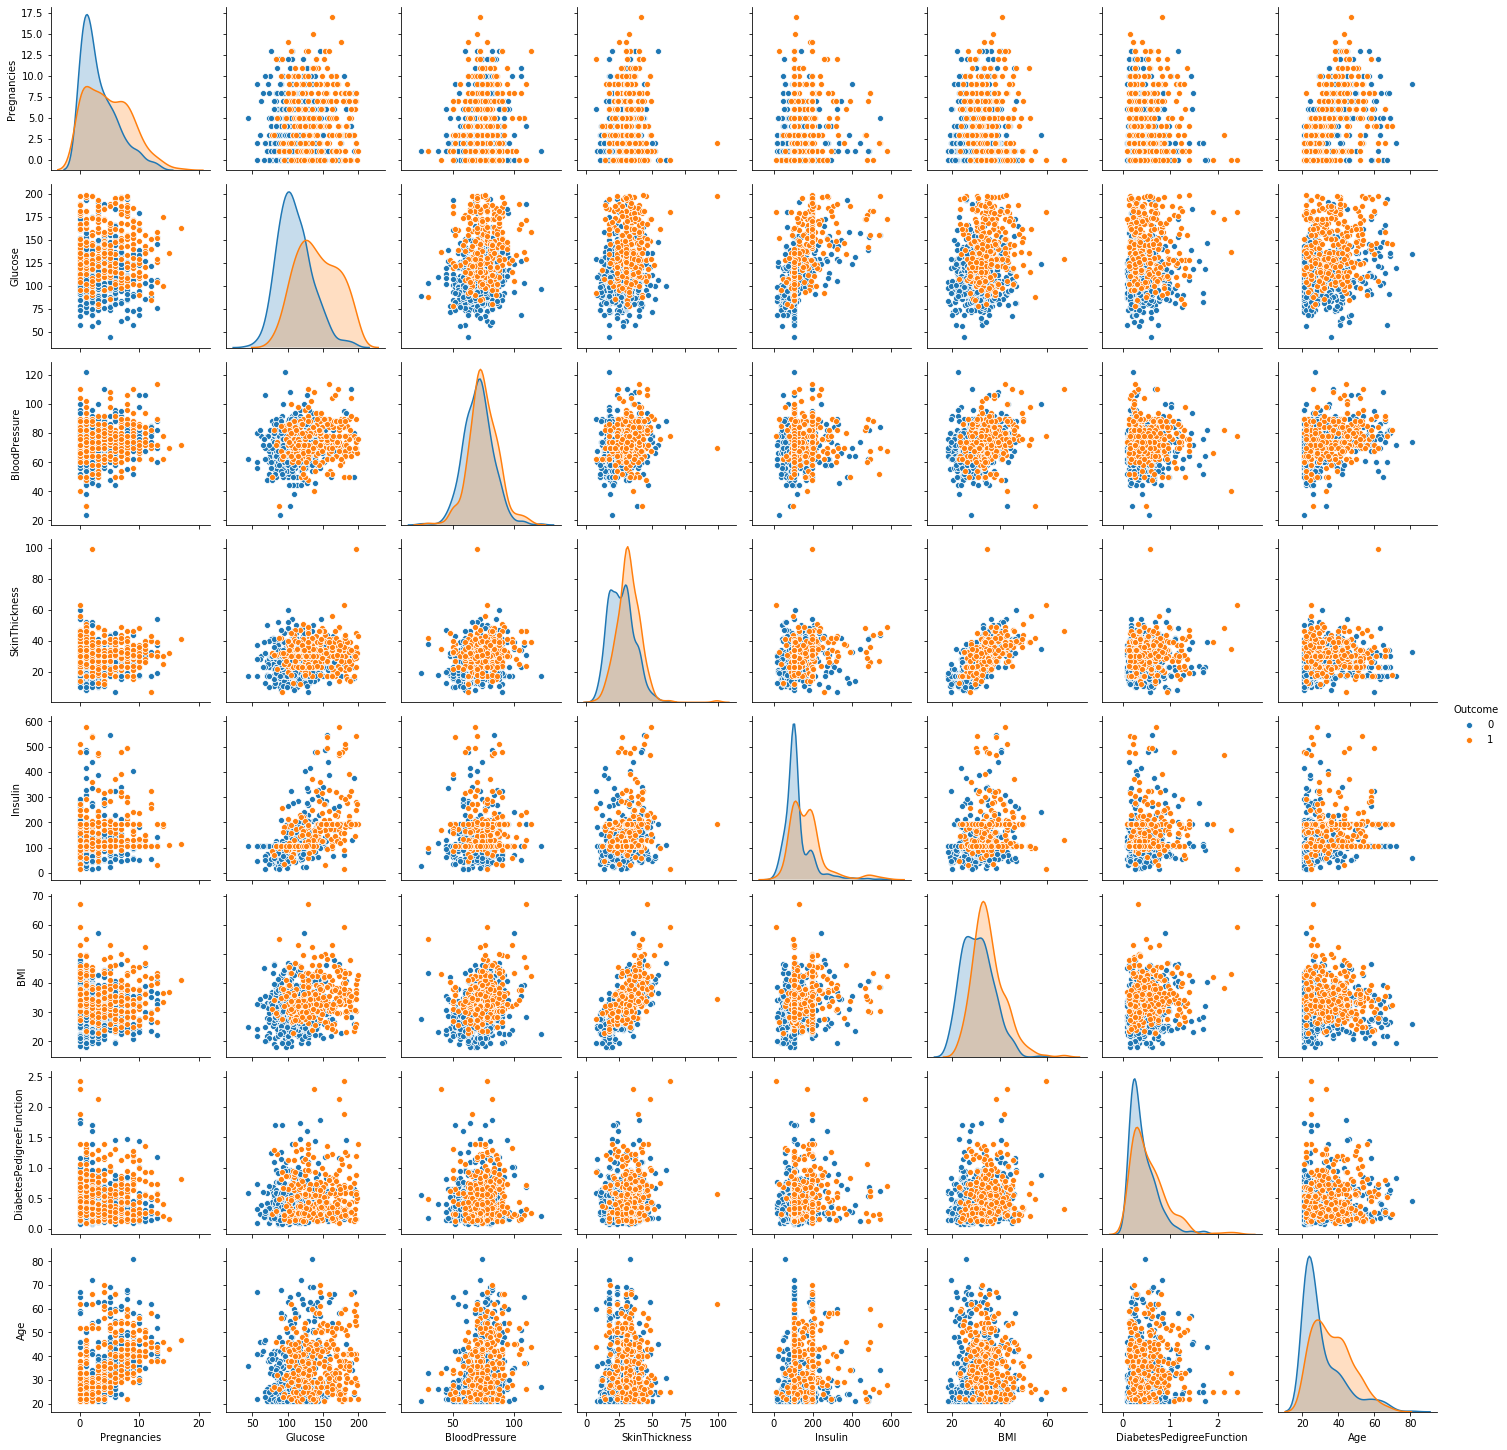

In [23]:
import seaborn as sns

cols = [col for col in df.columns if col != 'Outcome']

#sns.set(font_scale = 2)
#sns.set(style='ticks')
g = sns.pairplot(df, hue='Outcome', vars=cols)
#sns.set_context("paper", rc={"font.size":8})
#sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":8,"axes.labelsize":10},style="white")
#plt.savefig('Diabete2.png', dpi=600)
plt.show()

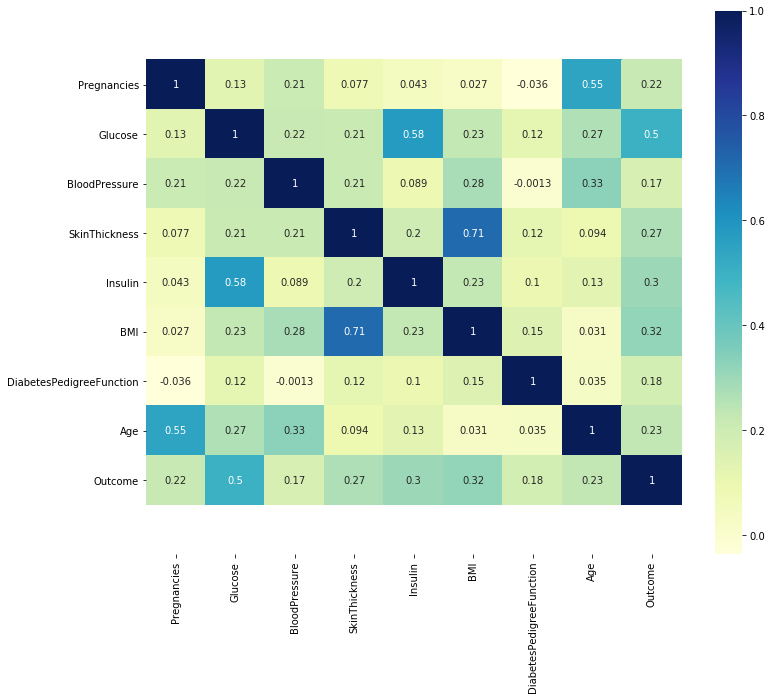

In [24]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(corr_matrix, annot= True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+1, top-1)
plt.show()

In [25]:
df['Outcome'].value_counts()

0    498
1    266
Name: Outcome, dtype: int64

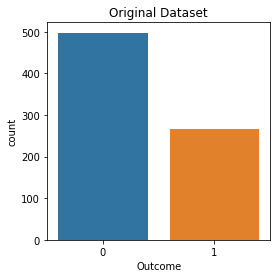

In [26]:
fig, ax = plt.subplots(figsize=(4, 4))
 
sns.countplot(x='Outcome', data=df)#, hue='Outcome')
plt.title('Original Dataset')
#ax.set_xticklabels(labels=('0','1'), va='center')
plt.show() 

<a id='clu'></a>
## Clustering ([to top](#top))

In [27]:
from pathlib import Path
import os

In [179]:
#folder = 'Log - tutte colonne'
folder = 'MinMax - tutte colonne'
path = 'C:/Users/Giulia/Documents/MasterSoBigData/DMML/Progetto/IMMAGINI/' + folder

In [112]:
Path(path).mkdir(parents=True)

In [180]:
os.chdir(path)

In [181]:
df.head(1)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    194.0  33.6   

   DiabetesPedigreeFunction  Age  Outcome  Label  
0                     0.627   50        1      0

<a id='norm'></a>
### Normalization
È buona pratica normalizzare gli attributi, in modo da evitare la distorsione data dalle diverse metriche impiegate e dal range dei diversi attributi.</br>
Useremo la normalizzazione Min-Max, poichè i dati non presentano una distribuzione Gaussiana e le variabili non presentano grandi outlier.

In [82]:
from sklearn.preprocessing import MinMaxScaler

In [182]:
columns_to_sel = [c for c in df.columns if c not in ['Outcome', 'Label']]
#columns_to_sel = ['Age', 'BMI', 'Glucose', 'Insulin', 'BloodPressure']

In [183]:
data = df[columns_to_sel]

In [184]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    194.0  33.6   
1            1     85.0           66.0           29.0    105.0  26.6   
2            8    183.0           64.0           17.0    194.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

**MinMax Scaler**

In [185]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(data.values))

In [186]:
X[:5]

0         1         2         3         4         5         6  \
0  0.352941  0.670968  0.489796  0.304348  0.318584  0.314928  0.234415   
1  0.058824  0.264516  0.428571  0.239130  0.161062  0.171779  0.116567   
2  0.470588  0.896774  0.408163  0.108696  0.318584  0.104294  0.253629   
3  0.058824  0.290323  0.428571  0.173913  0.141593  0.202454  0.038002   
4  0.000000  0.600000  0.163265  0.304348  0.272566  0.509202  0.943638   

          7  
0  0.483333  
1  0.166667  
2  0.183333  
3  0.000000  
4  0.200000

**Log Scaler**

In [127]:
from sklearn.preprocessing import FunctionTransformer

In [118]:
X = pd.DataFrame(np.log(data.values+1))

In [119]:
X[:5]

0         1         2         3         4         5         6  \
0  1.945910  5.003946  4.290459  3.583519  5.273000  3.543854  0.486738   
1  0.693147  4.454347  4.204693  3.401197  4.663439  3.317816  0.300845   
2  2.197225  5.214936  4.174387  2.890372  5.273000  3.190476  0.514021   
3  0.693147  4.499810  4.204693  3.178054  4.553877  3.370738  0.154436   
4  0.000000  4.927254  3.713572  3.583519  5.129899  3.786460  1.190279   

          7  
0  3.931826  
1  3.465736  
2  3.496508  
3  3.091042  
4  3.526361

<a id='km'></a>
### K-Means ([to clusterting](#clu))

In [187]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score

Cerchiamo di individuare il K migliore in base ai valori di SSE

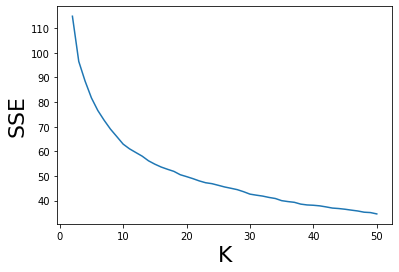

In [188]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    clustering = KMeans(n_clusters=k, n_init=10, max_iter=100, random_state=0)
    clustering.fit(X)
    sse = clustering.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='minor', labelsize=22)
#plt.show()
plt.savefig('SSE_k.png')

Poiché il gomito non è ben definito osserviamo i valori di SSE e Silhoutte per K che va da 2 a 10

In [122]:
sscores = []
sse_list = []

max_k = 8
for cls in range(max_k):
    clustering = KMeans(n_clusters=cls+2, random_state=0, n_init=10, max_iter=100)
    clustering.fit(X)
    sscore = silhouette_score(X, clustering.labels_)
    sse = clustering.inertia_
    sscores.append(sscore)
    sse_list.append(sse)
    
df_val = pd.DataFrame({'K': range(2,max_k+2), 'SSE': sse_list, 'Silhouette Score': sscores})
print(df_val)

   K         SSE  Silhouette Score
0  2  592.156569          0.321710
1  3  491.744112          0.265142
2  4  429.943435          0.227659
3  5  388.496508          0.221238
4  6  357.023290          0.217277
5  7  333.270234          0.193380
6  8  313.801815          0.186216
7  9  296.491905          0.190115


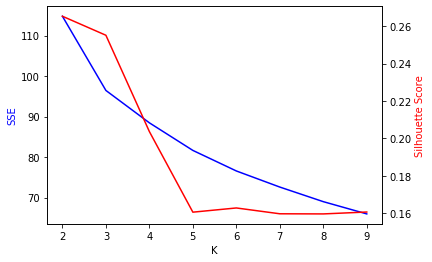

In [40]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df_val['K'], df_val['SSE'], 'b-')
ax1.set_ylabel('SSE', color = 'b')
ax1.set_xlabel('K', color = 'black')

ax2 = ax1.twinx()
ax2.plot(df_val['K'], df_val['Silhouette Score'], 'r-')
ax2.set_ylabel('Silhouette Score', color='r')
plt.show()

Dal confronto tra SSE e Silhouette si può osservere che il K migliore è 2.

In [189]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100, random_state=0)
kmeans.fit(X)  

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [124]:
labels, sizes = np.unique(kmeans.labels_, return_counts=True)
for l, s in zip(labels, sizes):
    print('Cluster %d: %s (%.2f)' % (l, s, s/len(X)))

Cluster 0: 393 (0.51)
Cluster 1: 371 (0.49)


In [190]:
columns_to_sel

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [191]:
# con scaler
centers = scaler.inverse_transform(kmeans.cluster_centers_)

In [128]:
# con log
transformer = FunctionTransformer(np.exp)
centers = transformer.transform(kmeans.cluster_centers_)

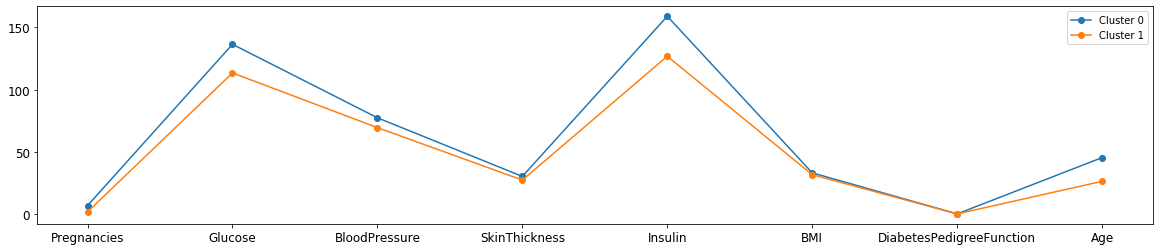

In [192]:
plt.figure(figsize=(20, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.yticks(fontsize=12)
plt.xticks(range(0, len(columns_to_sel)), columns_to_sel, fontsize=12, rotation=0)
plt.legend(fontsize=10)
#plt.show()
plt.savefig('cluster_linee.png')

Dal grafico si osserva che il KMeans fa fantica a distinguere i due cluster. 

In [193]:
def cluster_scatter_plt(df, attributi, label, center, k):
    
    n_rows = sum(range(1,len(attributi)))
    n_cols = 2 # c1 clusetring c2 popolazione originale 
    
    fig = plt.figure(figsize=(n_cols*8, n_rows*5)) 
    fig_dims = (n_rows, n_cols)
    
    row = 0 

    for i, a1 in enumerate(attributi[:-1]):
        for j,a2 in enumerate(attributi[i+1:]):
            for col in range(n_cols):
                
                # colonna 1 scatter clustering con centroidi
                if col == 0 :
                    plt.subplot2grid(fig_dims, (row, col))
                    
                    plt.scatter(df[a1], df[a2], c=label )  
                    plt.scatter(center[:,i],center[:,j+i+1], s=200, marker='*', c='g')
                    plt.xlabel(a1)
                    plt.ylabel(a2)
                    #plt.legend()
                    plt.title('Clustering k: {}'.format(k), fontsize=14)
                    
                # colonna e scatter clustering popolazione originale 
                else:

                    plt.subplot2grid(fig_dims, (row, col))

                    plt.scatter(df[df['Outcome']==0][a1], 
                    df[df['Outcome']==0][a2], 
                    color='g', marker='o', label='Out O', alpha=0.7)

                    plt.scatter(df[df['Outcome']==1][a1], 
                    df[df['Outcome']==1][a2], 
                    color='r', marker='x', label='Out 1', alpha=0.5)
                
                    plt.xlabel(a1)
                    plt.ylabel(a2)
                    plt.legend()
                    plt.title('Outcome', fontsize=14)
         
            row+=1
    #plt.show()
    plt.savefig('cluster_scatterplot.png')

Attraverso lo scatter plot mettiamo in evidenza a sinistra i cluster con i relativi centroidi trovati e a destra, sempre prendendo in considerazione le stesse feature, mettiamo in evidenza come si distribuiscono in diabetici e non.

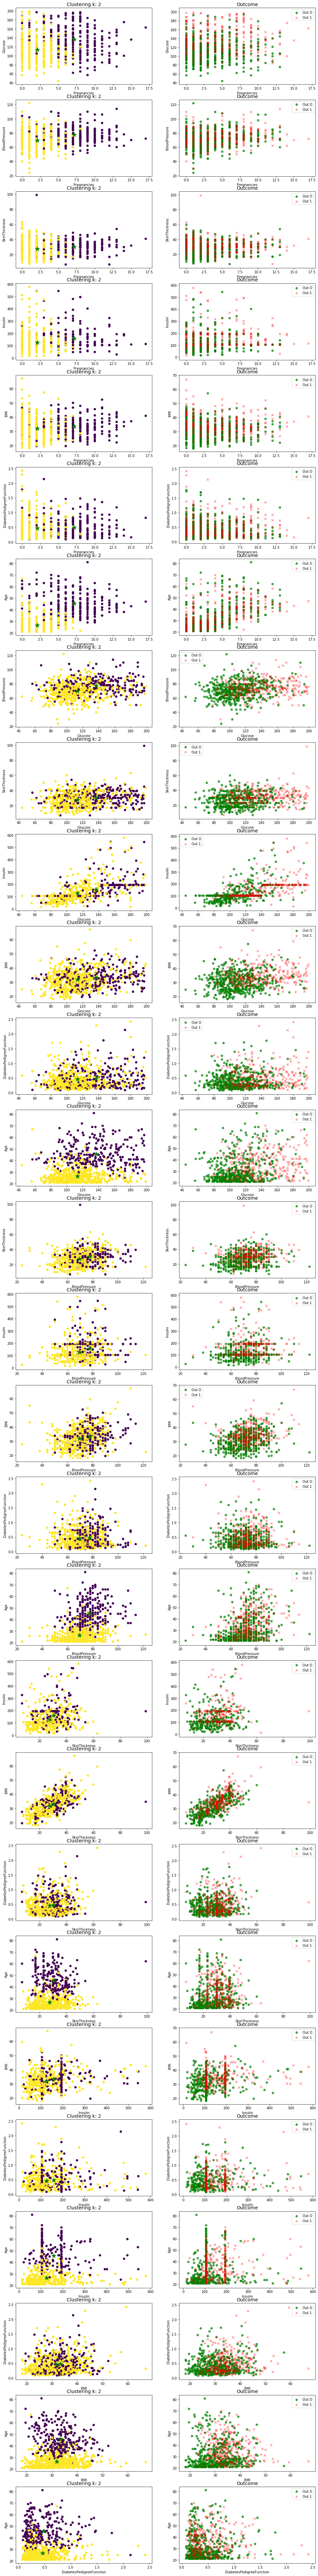

In [194]:
attributi = columns_to_sel

#center = scaler.inverse_transform(kmeans.cluster_centers_)
label = kmeans.labels_
cluster_scatter_plt(df, attributi, label, centers, k)

Homogeneity_score: score between 0.0 and 1.0. 1.0 stands for perfectly homogeneous labeling

In [195]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))   
print("Homogeneity_score %.6f" % homogeneity_score(df['Outcome'], kmeans.labels_))

SSE 114.78912640679252
Silhouette 0.2653247389223185
Homogeneity_score 0.077813


Utilizzando la Silhouette come parametro per valutare la qualità del clustering possiamo dire che il KMeans non ci permette di individuare dei cluster ben distinti.
Una conferma visiva possiamo trovarla anche dagli scatter plot ottenuti considerando due attributi alla volta. Inoltre, anche il valore della SSE risulta abbastanza alto.

Il valore di K dovrebbe essere 2, ma comunque non raggiungiamo buoni risultati in Silhouette e SSE.

Abbiamo notato, inoltre, che eliminando gli outlier dall'attributo 'Insulina' la Silhouette sembra migliorare.

In [45]:
# columns_to_sel = [c for c in df.columns if c not in ['Outcome']]

# data = df[(df['Insulin'] < 300)]

# #data = df[columns_to_sel]
# scaler = MinMaxScaler()
# X1 = pd.DataFrame(scaler.fit_transform(data.values))

# sscores = []
# sse_list = []

# max_k = 8
# for cls in range(max_k):
#     clustering = KMeans(n_clusters=cls+2, random_state=0, n_init=10, max_iter=100)
#     clustering.fit(X1)
#     sscore = silhouette_score(X1, clustering.labels_)
#     sse = clustering.inertia_
#     sscores.append(sscore)
#     sse_list.append(sse)
    
# df_val = pd.DataFrame({'K': range(2,max_k+2), 'SSE': sse_list, 'Silhouette Score': sscores})
# print(df_val)

<a id='dbs'></a>
## DBSCAN ([to clusterting](#clu))

In [169]:
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

Abbiamo fissato MinPts a 10 poiché dopo diversi tentativi abbiamo notato che era quello con Silhouette migliore.
A questo punto attraverso il grafico seguente scegliamo l'opportuno valore di Eps.

In [196]:
min_samples = 8

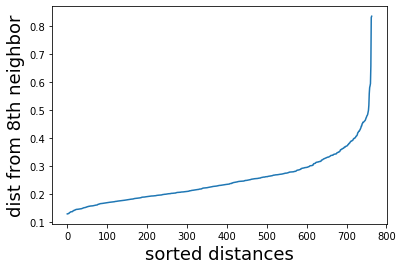

In [197]:
dist = pdist(X, 'euclidean')
dist = squareform(dist)

k = min_samples
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='minor', labelsize=22)
#plt.show()
plt.savefig('dbscan_mindist.png')

In [136]:
min_eps = 0.27
max_eps = 0.7
step = 0.01
l = X.shape[0]

for eps in np.arange(min_eps, max_eps, step):
        eps = round(eps, 2)
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        X1 = list()
        labels = list()
        for i in range(0, l):
            if dbscan.labels_[i] != -1:
                X1.append(X.iloc[i])
                labels.append(dbscan.labels_[i])
       
        if len(np.unique(dbscan.labels_, return_counts=True)[0]) > 2:
            sil = silhouette_score(np.array(X1), np.array(labels))
            print(sil)
            #if int(sil*100) > 50:
            print('-Eps: ', eps, '-Silhouette %s' % sil, '-Distrib:'\
                          , np.unique(dbscan.labels_, return_counts=True)[1])
            df['Label'] = dbscan.labels_
            print(df['Outcome'].groupby(df['Label']).value_counts())                

0.6601880864313115
-Eps:  0.28 -Silhouette 0.6601880864313115 -Distrib: [738  10   8   8]
Label  Outcome
-1     0          483
       1          255
 0     0            5
       1            5
 1     0            6
       1            2
 2     0            4
       1            4
Name: Outcome, dtype: int64
0.47685786921227563
-Eps:  0.29 -Silhouette 0.47685786921227563 -Distrib: [716  10  15   7   8   8]
Label  Outcome
-1     0          468
       1          248
 0     0            5
       1            5
 1     1            8
       0            7
 2     0            5
       1            2
 3     0            6
       1            2
 4     0            7
       1            1
Name: Outcome, dtype: int64
0.47886680047525676
-Eps:  0.3 -Silhouette 0.47886680047525676 -Distrib: [712  10  15  10   9   8]
Label  Outcome
-1     0          465
       1          247
 0     0            5
       1            5
 1     1            8
       0            7
 2     0            9
       1        

0.3246567297925093
-Eps:  0.52 -Silhouette 0.3246567297925093 -Distrib: [120 562  82]
Label  Outcome
-1     0           76
       1           44
 0     0          365
       1          197
 1     0           57
       1           25
Name: Outcome, dtype: int64
0.3222283271405205
-Eps:  0.53 -Silhouette 0.3222283271405205 -Distrib: [102 578  84]
Label  Outcome
-1     0           63
       1           39
 0     0          376
       1          202
 1     0           59
       1           25
Name: Outcome, dtype: int64
0.3219760302902812
-Eps:  0.54 -Silhouette 0.3219760302902812 -Distrib: [ 96 582  86]
Label  Outcome
-1     0           60
       1           36
 0     0          378
       1          204
 1     0           60
       1           26
Name: Outcome, dtype: int64
0.31919775756078417
-Eps:  0.55 -Silhouette 0.31919775756078417 -Distrib: [ 89 589  86]
Label  Outcome
-1     0           57
       1           32
 0     0          381
       1          208
 1     0           60
    

In [198]:
eps = 0.15
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=8, n_jobs=None, p=None)

In [177]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([ 69, 689,   6], dtype=int64))

In [199]:
X1 = list()
labels = list()
l = X.shape[0]
for i in range(0, l):
    if dbscan.labels_[i] != -1:
        X1.append(X.iloc[i])
        labels.append(dbscan.labels_[i])

print('Silhouette %s' % silhouette_score(X1, labels))
print("Homogeneity_score %.6f" % homogeneity_score(df['Outcome'], dbscan.labels_))

Silhouette 0.47563347359899505
Homogeneity_score 0.057514


Non togliamo gli outlier perché il DBSCAN non è particolarmente sensibile a questi, e quindi il valore Silhouette non migliora.
Il basso valore di Silhouette può essere spiegato da una bassa differenza di densità dei dati.

<a id='ch'></a>
##  Hierarchical Clustering ([to clusterting](#clu))

In [140]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

**Complete-link**

Silhouette 0.07188878514844452
Homogeneity_score 0.045959


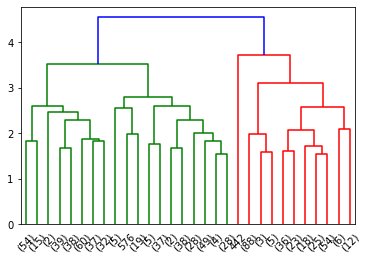

In [142]:
threshold_c = 4

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=threshold_c, truncate_mode='lastp')
labels = fcluster(data_link, t=threshold_c, criterion='distance')
print('Silhouette %s' % silhouette_score(X, labels))
#print('Labels', np.unique(labels, return_counts=True))
print("Homogeneity_score %.6f" % homogeneity_score(df['Outcome'], labels))
plt.savefig('gerarchico_complete.png')

In [58]:
# columns_to_sel = [c for c in df.columns if c not in ['Outcome']]

# data = df[df['Insulin'] < 300]

# #data = df[columns_to_sel]
# scaler = MinMaxScaler()
# X1 = pd.DataFrame(scaler.fit_transform(data.values))

# threshold_s = 1.9

# data_dist = pdist(X1, metric='euclidean')
# data_link = linkage(data_dist, method='complete', metric='euclidean')
# res = dendrogram(data_link, color_threshold=threshold_s, truncate_mode='lastp')
# labels = fcluster(data_link, t=threshold_s, criterion='distance')
# print('Silhouette %s' % silhouette_score(X1, labels))
# print('Labels', np.unique(labels, return_counts=True))
# #print("Homogeneity_score %.6f" % homogeneity_score(df['Outcome'], labels))

**Single-link**

Silhouette 0.501408193877025
Homogeneity_score 0.002139


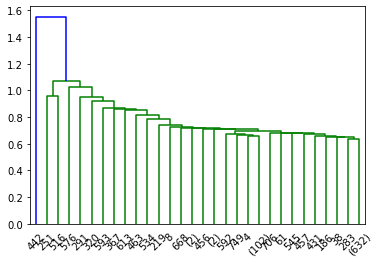

In [144]:
threshold_s = 1.2

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=threshold_s, truncate_mode='lastp')
labels = fcluster(data_link, t=threshold_s, criterion='distance')
print('Silhouette %s' % silhouette_score(X, labels))
#print('Labels', np.unique(labels, return_counts=True))
print("Homogeneity_score %.6f" % homogeneity_score(df['Outcome'], labels))
plt.savefig('gerarchico_single.png')

In [60]:
# columns_to_sel = [c for c in df.columns if c not in ['Outcome']]

# data = df[df['Insulin'] < 300]

# #data = df[columns_to_sel]
# scaler = MinMaxScaler()
# X1 = pd.DataFrame(scaler.fit_transform(data.values))

# threshold_s = 0.9

# data_dist = pdist(X1, metric='euclidean')
# data_link = linkage(data_dist, method='single', metric='euclidean')
# res = dendrogram(data_link, color_threshold=threshold_s, truncate_mode='lastp')
# labels = fcluster(data_link, t=threshold_s, criterion='distance')
# print('Silhouette %s' % silhouette_score(X1, labels))
# print('Labels', np.unique(labels, return_counts=True))

**Average-link**

Silhouette 0.3536719402545358
Labels (array([1, 2], dtype=int32), array([754,  10], dtype=int64))
Homogeneity_score 0.003390


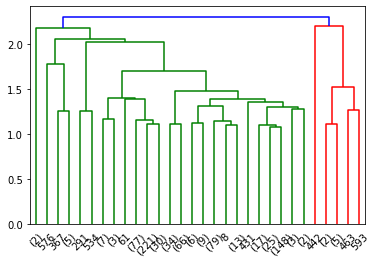

In [146]:
threshold_a = 2.3

data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=threshold_a, truncate_mode='lastp')
labels = fcluster(data_link, t=threshold_a, criterion='distance')
print('Silhouette %s' % silhouette_score(X, labels))
print('Labels', np.unique(labels, return_counts=True))
print("Homogeneity_score %.6f" % homogeneity_score(df['Outcome'], labels))
plt.savefig('gerarchico_avg.png')

In [62]:
# columns_to_sel = [c for c in df.columns if c not in ['Outcome']]

# data = df[df['Insulin'] < 300]

# #data = df[columns_to_sel]
# scaler = MinMaxScaler()
# X1 = pd.DataFrame(scaler.fit_transform(data.values))

# threshold_s = 1.1

# data_dist = pdist(X1, metric='euclidean')
# data_link = linkage(data_dist, method='average', metric='euclidean')
# res = dendrogram(data_link, color_threshold=threshold_s, truncate_mode='lastp')
# labels = fcluster(data_link, t=threshold_s, criterion='distance')
# print('Silhouette %s' % silhouette_score(X1, labels))
# print('Labels', np.unique(labels, return_counts=True))

<p style='color:red'>Togliendo i valori alti di 'Insulina' e guardando i valori di Silhouette, il clustering di tipo gerarchico sembra darci buoni risultati.</p>

<a id='cla'></a>
## Classification - Decision Tree ([to top](#top))

**Dataset Partitioning into Train and Test**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
features = [c for c in df.columns if c not in ['Outcome']]

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Outcome'], 
                                                    test_size=0.3, stratify=df['Outcome'])

In [22]:
scoring = 'accuracy' #

In [23]:
df['Outcome'].value_counts() / len(df)*100

0    65.183246
1    34.816754
Name: Outcome, dtype: float64

In [24]:
df.shape

(764, 9)

**Create a Decision Tree Classifier**

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [30]:
df['Outcome'].value_counts()

0    498
1    266
Name: Outcome, dtype: int64

Poiché le classi da predire risultano abbastanza sbilanciate e noi vorremmo creare un classificatore che riesca a predire i pazienti con diabete (classe 1), abbiamo deciso di includere il parametro class_weight nei parametri per il Decision Tree.

In [26]:
clf = DecisionTreeClassifier()

param = {
    'max_depth': [2, 4, 6, 8, 10, 15],
    'min_samples_leaf': [2, 3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 3, 10, 15, 20],
    #'class_weight': [None, 'balanced', {0: 0.1, 1: 0.9}, {0: 0.3, 1: 0.7}],
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy'],
}

Scegliamo di usare RandomizedSearchCV su X_train (non su tutto il dataset!!!) per provare le diverse configurazioni del Decision Tree e scegliere quella migliore.

In [27]:
rs = RandomizedSearchCV(clf, param_distributions=param, n_iter=200, cv=10, scoring=scoring)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [28]:
rs.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 20,
 'max_depth': 8,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [29]:
clf = rs.best_estimator_

In [30]:
for col, imp in zip(features, clf.feature_importances_):
    print(col, imp)

Pregnancies 0.0
Glucose 0.4235359278144933
BloodPressure 0.01072375435601893
SkinThickness 0.0
Insulin 0.06055587710897971
BMI 0.29103050146393616
DiabetesPedigreeFunction 0.060496091364066085
Age 0.1536578478925057


__Visualizzazione del Decision Tree__

In [31]:
import pydotplus
from sklearn import tree
from IPython.display import Image

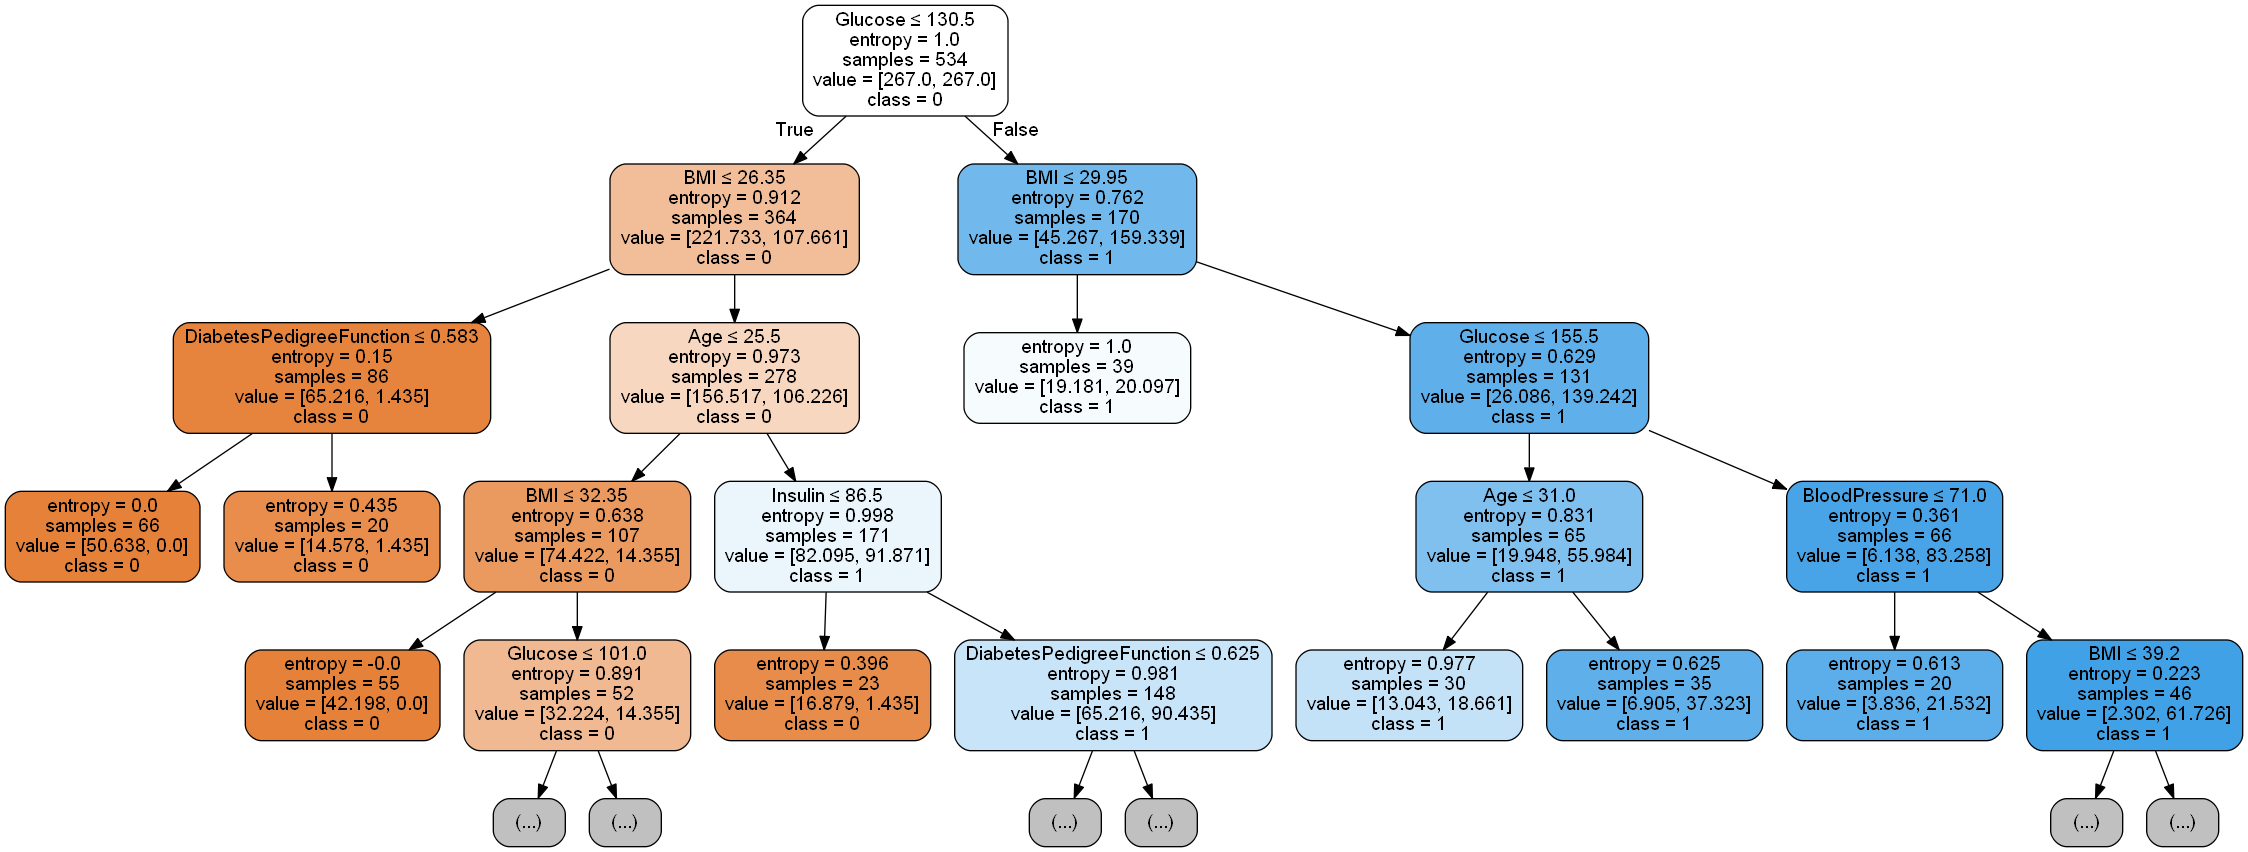

In [32]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=features,
                               class_names=clf.classes_.astype(str), 
                                filled= True, rounded=True, 
                                special_characters=True, 
                                max_depth= 4
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

**Valutazione training set**

In [34]:
y_pred = clf.predict(X_train)
print('Accuracy: {}'.format(accuracy_score(y_train, y_pred)))
print('F1-score: {}'.format(f1_score(y_train, y_pred, average=None)))

Accuracy: 0.7865168539325843
F1-score: [0.82568807 0.72463768]


In [35]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       348
           1       0.66      0.81      0.72       186

    accuracy                           0.79       534
   macro avg       0.77      0.79      0.78       534
weighted avg       0.80      0.79      0.79       534



In [36]:
confusion_matrix(y_train, y_pred)

array([[270,  78],
       [ 36, 150]], dtype=int64)

**Valutazione test set**

In [37]:
y_pred = clf.predict(X_test)

In [38]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('F1-score: {}'.format(f1_score(y_test, y_pred, average=None)))

Accuracy: 0.7347826086956522
F1-score: [0.77818182 0.67027027]


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       150
           1       0.59      0.78      0.67        80

    accuracy                           0.73       230
   macro avg       0.72      0.74      0.72       230
weighted avg       0.76      0.73      0.74       230



In [40]:
confusion_matrix(y_test, y_pred)

array([[107,  43],
       [ 18,  62]], dtype=int64)

**Overfitting curve**

Scelta max_depth

In [41]:
best_params = rs.best_params_
best_params

{'min_samples_split': 2,
 'min_samples_leaf': 20,
 'max_depth': 8,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

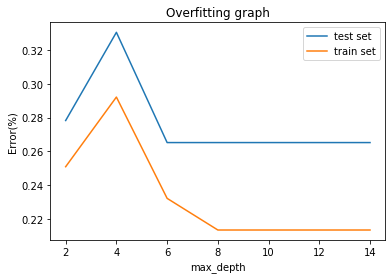

In [43]:
accuracy_list = list()
accuracy_list_train = list()

max_d = range(2, 15, 2)
#for max_depth in param['max_depth']:
for max_depth in max_d:
    clf = DecisionTreeClassifier(max_depth=max_depth, 
                                 min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 criterion=best_params['criterion'],
                                 class_weight=best_params['class_weight'],
                                 random_state=0)
    clf.fit(X_train, y_train)
    
    accuracy_train = accuracy_score(clf.predict(X_train), y_train)
    accuracy_test = accuracy_score(clf.predict(X_test), y_test)
    
    accuracy_list_train.append(1-accuracy_train)
    accuracy_list.append(1-accuracy_test)

plt.plot(max_d, accuracy_list, label='test set')
plt.plot(max_d, accuracy_list_train, label='train set')
plt.ylabel('Error(%)')
plt.xlabel('max_depth')
plt.title('Overfitting graph')
plt.legend()
plt.show()

Scelta min_samples_leaf

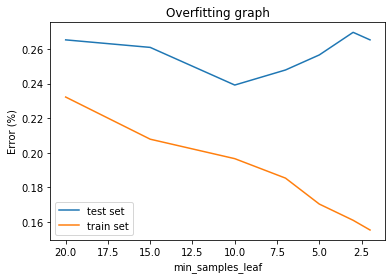

In [47]:
accuracy_list = list()
accuracy_list_train = list()
max_depth = 6
         
for min_samples_leaf in param['min_samples_leaf']:
#for min_samples_leaf in [2, 5, 7, 10, 12, 15]:
    clf = DecisionTreeClassifier(max_depth=max_depth, 
                                 min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=min_samples_leaf,
                                 criterion=best_params['criterion'],
                                 class_weight=best_params['class_weight'],
                                 random_state=0)
    clf.fit(X_train, y_train)
        
    accuracy_train = accuracy_score(clf.predict(X_train), y_train)
    accuracy_test = accuracy_score(clf.predict(X_test), y_test)
    
    accuracy_list_train.append(1-accuracy_train)
    accuracy_list.append(1-accuracy_test)

plt.plot(param['min_samples_leaf'], accuracy_list, label='test set')
plt.plot(param['min_samples_leaf'], accuracy_list_train, label='train set')
plt.ylabel('Error (%)')
plt.gca().invert_xaxis()
plt.xlabel('min_samples_leaf')
plt.title('Overfitting graph')
plt.legend()
plt.show()

**Best decision trees visualization and interpretation**

In [45]:
best_params

{'min_samples_split': 2,
 'min_samples_leaf': 20,
 'max_depth': 8,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [48]:
# best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, 
#                                   min_samples_split=2, min_samples_leaf=10,
#                                   class_weight='balanced')
# best_clf.fit(X_train, y_train)

clf = DecisionTreeClassifier(criterion='gini', max_depth=6,
                             min_samples_split=15, min_samples_leaf=20, class_weight='balanced')
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=6, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [49]:
y_pred = best_clf.predict(X_test)

In [50]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('F1-score: {}'.format(f1_score(y_test, y_pred, average=None)))
dt_conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix\n', dt_conf_matrix)

Accuracy: 0.7608695652173914
F1-score: [0.80701754 0.68571429]

Confusion Matrix
 [[115  35]
 [ 20  60]]


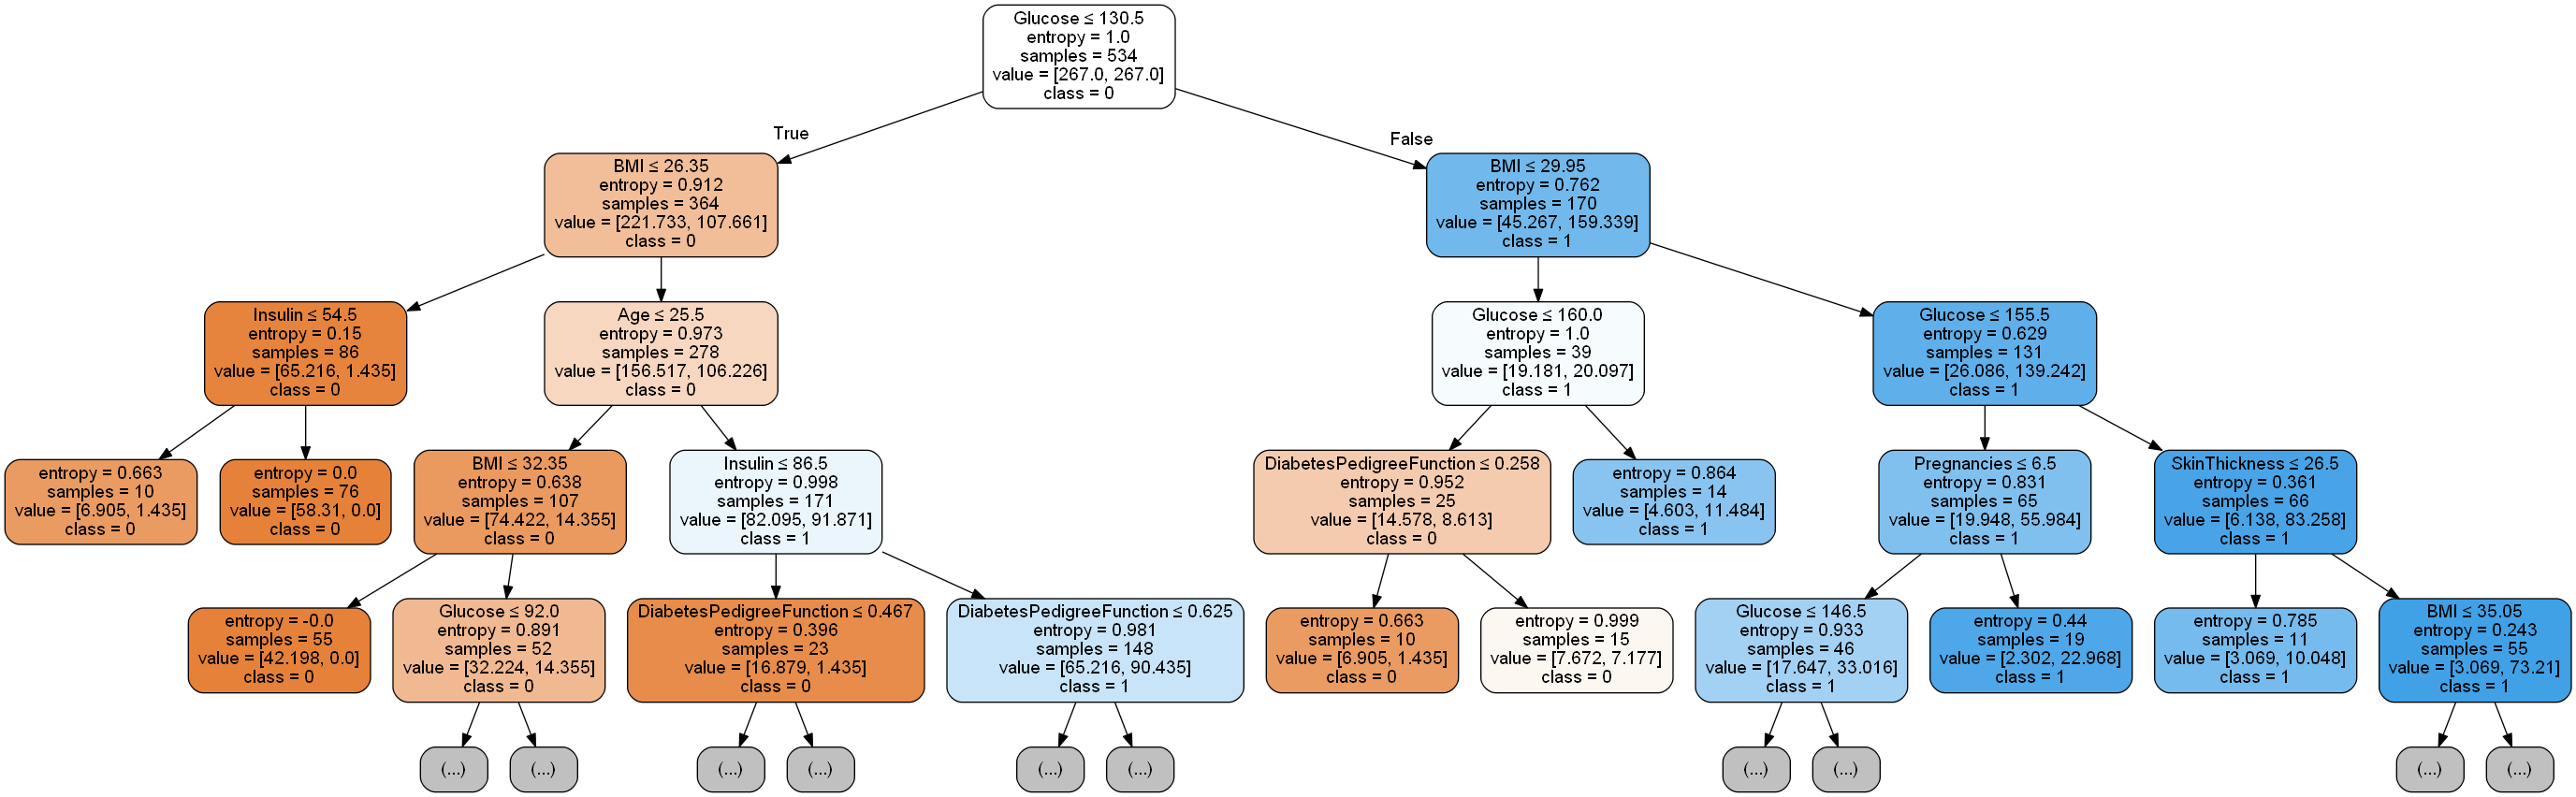

In [51]:
dot_data = tree.export_graphviz(best_clf, out_file=None,
                               feature_names=features,
                               class_names=best_clf.classes_.astype(str), 
                                filled= True, rounded=True, 
                                special_characters=True, 
                                max_depth= 4
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Grazie al RandomizerSearch siamo riusciti ad individuare il miglior decision tree con i seguenti parametri: 
- criterio =entropia
- profondità massima =4
- minimo campione per split =3
- minimo campione nelle foglie =3

Abbiamo notato che con questi parametri il decision tree non va in overfitting e riesce a classificare bene tra diabetici e non.

<p style='color:red'>Learning Curve</p>

In [2]:
# Learning Curve con media e deviazione standard dell'accuratezza

In [52]:
accuracy_list = list()
sample_numbers = list()

train_size_list = list(np.arange(0.1,0.95,0.05))  # train_size = 1-test_size -> parto da un train set col 10% di elementi 
train_size_list.append(100)

for ts in train_size_list:
    ts_accuracy = list()    
    
    for iteation in range(1,11):
        # prelevo i campioni su cui fare training
        if ts != 100:
            X_learn_train, _ , y_learn_train , _ = train_test_split(X_train, y_train, train_size=ts, random_state= None, stratify = y_train)

        else:
            X_learn_train = X_train
            y_learn_train = y_train
            
        #clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, 
        #                     min_samples_split=3, min_samples_leaf=3, class_weight=None) # uso i best parameters calcolati prima
        #possiamo usare il best_clf ?
        best_clf.fit(X_learn_train, y_learn_train) 
        y_pred = best_clf.predict(X_test) # predizione: uso i dati del test set solito (sempre lo stesso numero per ciscu)
        
        ts_accuracy.append(accuracy_score(y_test, y_pred)) # salvo il valore di accuracy calcolato per ogni train per ogni ts
                
            
    sample_numbers.append(len(X_learn_train)) # lista dimensioni campioni su cui alleno la curva (asse x grafico)
    accuracy_list.append(ts_accuracy) # lista contenenete le liste di valori di accuracy calcolati per ciascun ts        


In [53]:
accuracy_mean = list(map(lambda x: np.mean(x), accuracy_list))
accuracy_std = list(map(lambda x: np.std(x), accuracy_list))

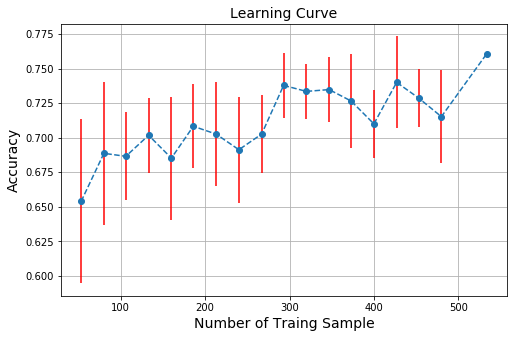

In [54]:
plt.figure(figsize=(8,5))

plt.errorbar(sample_numbers, accuracy_mean,yerr= accuracy_std, fmt='--o', ecolor='r')
plt.title('Learning Curve', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Number of Traing Sample', fontsize=14)
plt.grid()
plt.show()

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
import time 

In [56]:
param_list = {'max_depth': [None] + list(np.arange(2, 10)),
              'min_samples_split': [2, 3, 5, 7, 10, 15, 20],
              'min_samples_leaf': [1, 5, 10, 15, 20, 30],
              'criterion': ['gini', 'entropy'],
              'class_weight': ['balanced'],
             }

t1 = time.time()

clf = RandomForestClassifier(n_estimators=100)

random_search = RandomizedSearchCV(clf, param_distributions=param_list, 
                                  n_iter=100, cv=10, scoring=scoring)
random_search.fit(X_train, y_train) 

t2 = time.time()

print(t2-t1)

281.51169991493225


In [85]:
rf_clf = RandomForestClassifier(n_estimators=100, min_samples_split=10,
                             min_samples_leaf=10,
                             max_depth=8,
                             criterion='gini',
                             class_weight='balanced')
rf_clf.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
rf_clf = random_search.best_estimator_
rf_clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
y_pred_rf_test = rf_clf.predict(X_test)
y_pred_rf_train = rf_clf.predict(X_train)

In [87]:
print('Train:\nAccuracy: {}\nF1-score: {}'.format(np.round(accuracy_score(y_train, y_pred_rf_train),3), 
                                                  np.round(f1_score(y_train, y_pred_rf_train, average=None),3)))

print('Test:\nAccuracy: {}\nF1-score: {}'.format(np.round(accuracy_score(y_test, y_pred_rf_test),3), 
                                                  np.round(f1_score(y_test, y_pred_rf_test, average=None),3)))
print()
print(classification_report(y_test, y_pred_rf_test))

rf_conf_matrix = confusion_matrix(y_test, y_pred_rf_test)
print('Confusion Matrix\n', rf_conf_matrix)

Train:
Accuracy: 0.837
F1-score: [0.869 0.785]
Test:
Accuracy: 0.761
F1-score: [0.808 0.682]

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       150
           1       0.63      0.74      0.68        80

    accuracy                           0.76       230
   macro avg       0.74      0.76      0.75       230
weighted avg       0.77      0.76      0.76       230

Confusion Matrix
 [[116  34]
 [ 21  59]]


In [88]:
import seaborn as sns

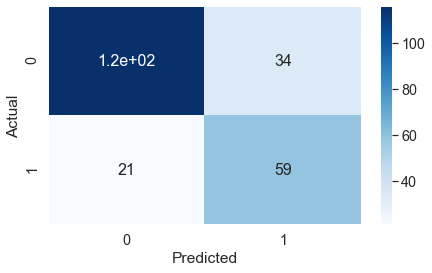

In [89]:
data = confusion_matrix(y_test, y_pred_rf_test)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,4))
sns.set(font_scale=1.3)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16});# font size

In [72]:
random_search.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 6,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [90]:
accuracy_list = list()
accuracy_list_train = list()
best_params = random_search.best_params_
tot_alberi =  range(10, 150, 20)

for num_alb in tot_alberi:
    clf = RandomForestClassifier(n_estimators=num_alb, 
                                 criterion=best_params['criterion'],
                                 max_depth=best_params['max_depth'], 
                                 min_samples_split=best_params['min_samples_split'], 
                                 min_samples_leaf=best_params['min_samples_leaf'], 
                                 class_weight=best_params['class_weight'])
    clf.fit(X_train, y_train) 
            
    accuracy_train = accuracy_score(clf.predict(X_train), y_train)
    accuracy_test = accuracy_score(clf.predict(X_test), y_test)
    
    accuracy_list_train.append(1-accuracy_train)
    accuracy_list.append(1-accuracy_test)

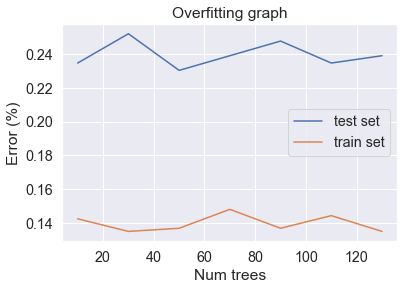

In [74]:
plt.plot(tot_alberi, accuracy_list, label='test set')
plt.plot(tot_alberi, accuracy_list_train, label='train set')
plt.ylabel('Error (%)')
plt.xlabel('Num trees')
plt.title('Overfitting graph')
plt.legend()
plt.show()

**AUROC**

In [75]:
from scikitplot.metrics import plot_roc

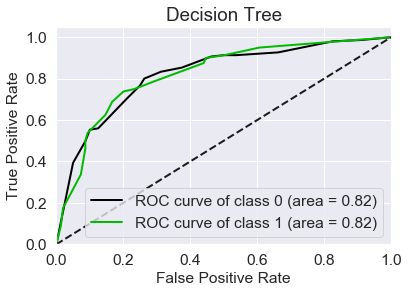

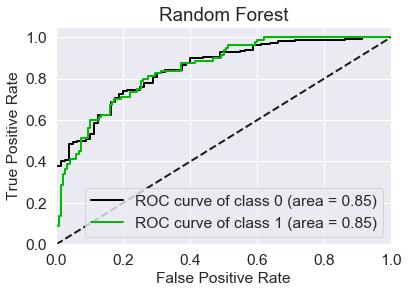

In [76]:
plot_roc(y_test, best_clf.predict_proba(X_test), plot_macro=False, plot_micro=False, title='Decision Tree')
plot_roc(y_test, rf_clf.predict_proba(X_test), plot_macro=False, plot_micro=False, title='Random Forest')
plt.show()

L'AUROC migliore risulta essere quella relativa al classificatore Random Forest, poiché delimita un'area maggiore che sta ad indicare un numero più alto di true positive individuato.

**Cost Matrix**

In [77]:
cost_matrix = [[1, 5],[25, 1]]
cost_matrix

[[1, 5], [25, 1]]

In [78]:
cost_rf = 0 
cost_dt = 0 
for i in range(2):
    for j in range(2):
        cost_rf += rf_conf_matrix[i][j] * cost_matrix[i][j]
        cost_dt += dt_conf_matrix[i][j] * cost_matrix[i][j]
        
print('Cost matrix Decision Tree:', cost_dt)
print('Cost matrix Random Forest:', cost_rf)

Cost matrix Decision Tree: 850
Cost matrix Random Forest: 870


Abbiamo deciso di utilizzare una matrice dei costi, in modo da identificare il modello con minor costo che corrisponde a quello che genera un numero minore di false negative.
Per il nostro fine, il Random Forest risulta essere il modello migliore.

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
y = df['Outcome'].values
features = [c for c in df.columns if c!='Outcome']
X =df[features].values
scores_dt = cross_val_score(best_clf, X, y, cv=50, scoring='accuracy') #cambiato
scores_rf = cross_val_score(rf_clf, X, y, cv=50, scoring='accuracy') #cambiato
print('DecisionTree accuracy: mean ', np.mean(scores_dt), 'std ', np.std(scores_dt)) #cambiato
print('RandomForest accuracy: mean ',np.mean(scores_rf),'std ' ,np.std(scores_rf))

DecisionTree accuracy: mean  0.7140833333333334 std  0.10350754803394777
RandomForest accuracy: mean  0.7659999999999999 std  0.12131616178857256


<a id='pm'></a>
## Pattern Mining ([to top](#top))

In [109]:
from fim import apriori

In [110]:
min_BMI = min(df['BMI'])
max_BMI = max(df['BMI'])
bins = [min_BMI-1, 25, 35, 45, max_BMI+1]

df['BMI_bin'] = pd.cut(x=df['BMI'], bins=bins, right=False)
df['BMI_bin'].value_counts()

[25.0, 35.0)    412
[35.0, 45.0)    211
[17.2, 25.0)    106
[45.0, 68.1)     35
Name: BMI_bin, dtype: int64

In [111]:
#df['BloodPressure_bin'] = pd.cut(df['BloodPressure'].astype(int), 3, right=False)
min_BloodPressure = min(df['BloodPressure'])
max_BloodPressure = max(df['BloodPressure'])
bins = [min_BloodPressure-1, 60, 80, 85, 90, 100, 110, max_BloodPressure+1]
df['BloodPressure_bin'] = pd.cut(x=df['BloodPressure'], bins=bins, right=False)
df['BloodPressure_bin'].value_counts()

[60.0, 80.0)      474
[80.0, 85.0)       93
[23.0, 60.0)       86
[85.0, 90.0)       52
[90.0, 100.0)      43
[100.0, 110.0)     11
[110.0, 123.0)      5
Name: BloodPressure_bin, dtype: int64

In [112]:
max_glucose = max(df['Glucose'])
bins = [0, 70, 140, 170, max_glucose]
df['Glucose_bin'] = pd.cut(df['Glucose'], bins=bins, right=False)
df['Glucose_bin'].value_counts()

[70.0, 140.0)     559
[140.0, 170.0)    125
[170.0, 199.0)     68
[0.0, 70.0)        11
Name: Glucose_bin, dtype: int64

In [113]:
min_insulin = min(df['Insulin'])
max_insulin = max(df['Insulin'])
bins = np.arange(min_insulin, max_insulin, 200)
df['Insulin_bin'] = pd.cut(df['Insulin'], bins=bins, right=False)
df['Insulin_bin'].value_counts()

[14.0, 214.0)     693
[214.0, 414.0)     56
Name: Insulin_bin, dtype: int64

In [114]:
min_age = min(df['Age'])
max_age = max(df['Age'])
bins = range(min_age, max_age, 10)
df['Age_bin'] = pd.cut(df['Age'].astype(int), bins=bins, right=False)
df['Age_bin'].value_counts()

[21, 31)    416
[31, 41)    156
[41, 51)    113
[51, 61)     52
[61, 71)     25
Name: Age_bin, dtype: int64

In [115]:
max_skin = max(df['SkinThickness'])
bins = [0, 10, 20, 30, 40, 50, max_skin]
df['SkinThickness_bin'] = pd.cut(df['SkinThickness'].astype(int), bins=bins, right=False)
df['SkinThickness_bin'].value_counts()

[30.0, 40.0)    301
[20.0, 30.0)    215
[10.0, 20.0)    154
[40.0, 50.0)     78
[50.0, 99.0)     11
[0.0, 10.0)       4
Name: SkinThickness_bin, dtype: int64

In [116]:
max_preg = max(df['Pregnancies'])
bins = [0, 1, 3, 6, 8, max_preg]
df['Pregnancies_bin'] = pd.cut(df['Pregnancies'].astype(int), bins=bins, right=False)
df['Pregnancies_bin'].value_counts()

[1, 3)     237
[3, 6)     199
[8, 17)    122
[0, 1)     110
[6, 8)      95
Name: Pregnancies_bin, dtype: int64

In [117]:
max_dpf = max(df['DiabetesPedigreeFunction'])
bins = [0, 0.5, 1, 1.5, max_dpf]
df['DiabetesPedigreeFunction_bin'] = pd.cut(df['DiabetesPedigreeFunction'], bins=bins, right=False)
df['DiabetesPedigreeFunction_bin'].value_counts()

[0.0, 0.5)     489
[0.5, 1.0)     225
[1.0, 1.5)      41
[1.5, 2.42)      8
Name: DiabetesPedigreeFunction_bin, dtype: int64

In [120]:
df['Outcome'] = df['Outcome'].map(
    {0: 'Sana', 1: 'Diabetica'}).astype(str)

lista_attributi = [a for a in df.columns if (a != 'Outcome') and 'bin' not in a]

In [124]:
df.drop(lista_attributi, axis=1, inplace=True)

In [125]:
df.head()

Outcome       BMI_bin BloodPressure_bin     Glucose_bin    Insulin_bin  \
0  Diabetica  [25.0, 35.0)      [60.0, 80.0)  [140.0, 170.0)  [14.0, 214.0)   
1       Sana  [25.0, 35.0)      [60.0, 80.0)   [70.0, 140.0)  [14.0, 214.0)   
2  Diabetica  [17.2, 25.0)      [60.0, 80.0)  [170.0, 199.0)  [14.0, 214.0)   
3       Sana  [25.0, 35.0)      [60.0, 80.0)   [70.0, 140.0)  [14.0, 214.0)   
4  Diabetica  [35.0, 45.0)      [23.0, 60.0)   [70.0, 140.0)  [14.0, 214.0)   

    Age_bin SkinThickness_bin Pregnancies_bin DiabetesPedigreeFunction_bin  
0  [41, 51)      [30.0, 40.0)          [6, 8)                   [0.5, 1.0)  
1  [31, 41)      [20.0, 30.0)          [1, 3)                   [0.0, 0.5)  
2  [31, 41)      [10.0, 20.0)         [8, 17)                   [0.5, 1.0)  
3  [21, 31)      [20.0, 30.0)          [1, 3)                   [0.0, 0.5)  
4  [31, 41)      [30.0, 40.0)          [0, 1)                  [1.5, 2.42)

In [126]:
for attributo in df.columns:
    etichetta = attributo.split('_')[0]
    df[attributo] = df[attributo].astype(str)+'_'+etichetta
df.head()

Outcome           BMI_bin           BloodPressure_bin  \
0  Diabetica_Outcome  [25.0, 35.0)_BMI  [60.0, 80.0)_BloodPressure   
1       Sana_Outcome  [25.0, 35.0)_BMI  [60.0, 80.0)_BloodPressure   
2  Diabetica_Outcome  [17.2, 25.0)_BMI  [60.0, 80.0)_BloodPressure   
3       Sana_Outcome  [25.0, 35.0)_BMI  [60.0, 80.0)_BloodPressure   
4  Diabetica_Outcome  [35.0, 45.0)_BMI  [23.0, 60.0)_BloodPressure   

              Glucose_bin            Insulin_bin           Age_bin  \
0  [140.0, 170.0)_Glucose  [14.0, 214.0)_Insulin  [41.0, 51.0)_Age   
1   [70.0, 140.0)_Glucose  [14.0, 214.0)_Insulin  [31.0, 41.0)_Age   
2  [170.0, 199.0)_Glucose  [14.0, 214.0)_Insulin  [31.0, 41.0)_Age   
3   [70.0, 140.0)_Glucose  [14.0, 214.0)_Insulin  [21.0, 31.0)_Age   
4   [70.0, 140.0)_Glucose  [14.0, 214.0)_Insulin  [31.0, 41.0)_Age   

            SkinThickness_bin          Pregnancies_bin  \
0  [30.0, 40.0)_SkinThickness   [6.0, 8.0)_Pregnancies   
1  [20.0, 30.0)_SkinThickness   [1.0, 3.0)_Pregnancies   
2  [10.0, 20.0)_SkinThickness  [8.0, 17.0)_Pregnancies   
3  [20.0, 30.0)_SkinThickness   [1.0, 3.0)_Pregnancies   
4  [30.0, 40.0)_SkinThickness   [0.0, 1.0)_Pregnancies   

           DiabetesPedigreeFunction_bin  
0   [0.5, 1.0)_DiabetesPedigreeFunction  
1   [0.0, 0.5)_DiabetesPedigreeFunction  
2   [0.5, 1.0)_DiabetesPedigreeFunction  
3   [0.0, 0.5)_DiabetesPedigreeFunction  
4  [1.5, 2.42)_DiabetesPedigreeFunction

In [127]:
X = df.values.tolist()

In [128]:
itemsets = apriori(X, supp=2, zmin=2, target='a') 

In [129]:
print('Number of itemsets:', len(itemsets))

Number of itemsets: 4303


In [130]:
# cons, ant, [Abs supp, rel Sup, Conf, Lift] <-- report
itemsets[:2]

[(('[61.0, 71.0)_Age', '[14.0, 214.0)_Insulin'), 25),
 (('[61.0, 71.0)_Age', '[25.0, 35.0)_BMI', '[14.0, 214.0)_Insulin'), 19)]

In [152]:
rules = apriori(X, supp=2, zmin=2, target='r', conf=75, report='ascl') 

In [153]:
print('Number of rule:', len(rules))

Number of rule: 6830


In [96]:
for r in rules:
    if 'Outcome' in r[0]:
        print(r)

In [100]:
type(X_outcome)

tuple

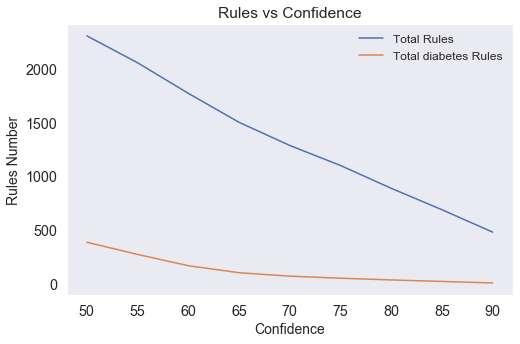

In [141]:
sup = list(range(1,11))
conf = list(range(50,91,5))

diabetes_rules_number = list()
rules_number = list()

for c in conf:
    rules = apriori(X, target='r', supp=2, zmin=2, conf=c, report='ascl')
    X_outcome = list()
    diabetes_rules = list()      
    for r in rules:
        if 'Outcome' in r[0]:
            #rules_number.append(len(rules))    
            X_outcome.append(r)
            
            # per ogni rules ricavo il numero di regole contenenti Diabete 
            if 'Diabetica' in r[0]:            
                diabetes_rules.append(r)   
    rules_number.append(len(X_outcome))
    diabetes_rules_number.append(len(diabetes_rules))

plt.figure(figsize=(8,5))
plt.plot(conf, rules_number, label='Total Rules')
plt.plot(conf, diabetes_rules_number, label='Total diabetes Rules')
plt.title('Rules vs Confidence')
plt.xlabel('Confidence', fontsize=14)
plt.ylabel('Rules Number', fontsize=14) 
plt.legend(loc="upper right", fontsize=12, frameon=False)
plt.grid()
plt.show()

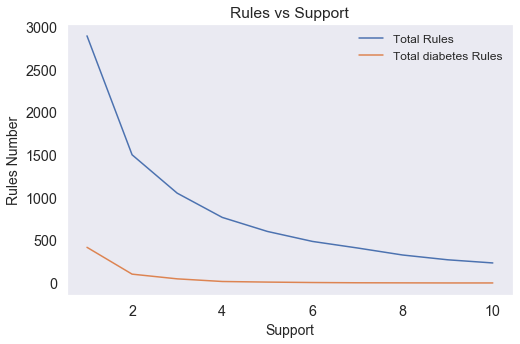

[417, 103, 48, 17, 10, 5, 2, 1, 0, 0]


In [142]:
sup = list(range(1,11))
conf = list(range(50,91,5))

diabetes_rules_number = list()
rules_number = list()

for s in sup:
    rules = apriori(X, target='r', supp=s, zmin=2, conf=65, report='ascl')
    X_outcome = list()
    diabetes_rules = list()      
    for r in rules:
        if 'Outcome' in r[0]:
            #rules_number.append(len(rules))    
            X_outcome.append(r)
            
            # per ogni rules ricavo il numero di regole contenenti Diabete 
            if 'Diabetica' in r[0]:            
                diabetes_rules.append(r)   
    rules_number.append(len(X_outcome))
    diabetes_rules_number.append(len(diabetes_rules))

plt.figure(figsize=(8,5))
plt.plot(sup, rules_number, label='Total Rules')
plt.plot(sup, diabetes_rules_number, label='Total diabetes Rules')
plt.title('Rules vs Support')
plt.xlabel('Support', fontsize=14)
plt.ylabel('Rules Number', fontsize=14) 
plt.legend(loc="upper right", fontsize=12, frameon=False)
plt.grid()
plt.show()
print(diabetes_rules_number)

In [154]:
rules = apriori(X, target='r', supp=2, zmin=2, conf=75, report='ascl')
out_list = list()
for r in rules:
    if 'Diabetica_Outcome' in r[0]:
        out_list.append(r)

In [157]:
out_list

[('Diabetica_Outcome',
  ('[1.0, 1.5)_DiabetesPedigreeFunction', '[25.0, 35.0)_BMI'),
  15,
  0.01963350785340314,
  0.75,
  2.154135338345865),
 ('Diabetica_Outcome',
  ('[170.0, 199.0)_Glucose', '[31.0, 41.0)_Age', '[14.0, 214.0)_Insulin'),
  13,
  0.017015706806282723,
  0.8125,
  2.3336466165413534),
 ('Diabetica_Outcome',
  ('[170.0, 199.0)_Glucose', '[31.0, 41.0)_Age'),
  16,
  0.020942408376963352,
  0.8421052631578947,
  2.4186782746339532),
 ('Diabetica_Outcome',
  ('[170.0, 199.0)_Glucose', '[3.0, 6.0)_Pregnancies'),
  16,
  0.020942408376963352,
  0.8421052631578947,
  2.4186782746339532),
 ('Diabetica_Outcome',
  ('[170.0, 199.0)_Glucose', '[35.0, 45.0)_BMI', '[30.0, 40.0)_SkinThickness'),
  16,
  0.020942408376963352,
  0.8888888888888888,
  2.553049289891395),
 ('Diabetica_Outcome',
  ('[170.0, 199.0)_Glucose', '[35.0, 45.0)_BMI', '[60.0, 80.0)_BloodPressure'),
  15,
  0.01963350785340314,
  0.9375,
  2.6926691729323307),
 ('Diabetica_Outcome',
  ('[170.0, 199.0)_Glucose'

In [161]:
import csv

In [162]:
# cons, ant, [Abs supp, rel Sup, Conf, Lift] <-- report
list_diabetica = sorted(out_list, key=lambda x: x[5], reverse=True)

In [163]:
with open('regole_diabetiche.csv', 'a') as handle:
    fw = csv.writer(handle)
    for line in list_diabetica:
        fw.writerow(line)

In [ ]:
# Grafico Numero di Regole al variare del supporto e della confidenza

In [146]:
sup = list(range(1,11))
conf = list(range(50,91,5))

total_rules_number = list()  #  [[],[],[]] riga = supporto; colonna = numero di regole per confidenza
outcome_rules_number = list()
diabete_rules_number = list()

In [147]:
for s in sup:
    c_rules = list()
    c_out_rules = list()
    c_diabete_rules = list()
    
    for c in conf:
        
        out_count = 0 
        diabete_count = 0
        
        # Ricavo il numero di regole per (s,c)
        rules = apriori(X, target='r', supp=s, zmin=2, conf=c, report='ascl')
        c_rules.append(len(rules))
        
        for r in rules:
            if "Outcome" in r[0]:
                out_count += 1 
                
                if 'Diabetica' in r[0]:
                    diabete_count += 1
                    
        c_out_rules.append(out_count)
        c_diabete_rules.append(diabete_count)
        
    total_rules_number.append(c_rules)
    outcome_rules_number.append(c_out_rules)
    diabete_rules_number.append(c_diabete_rules)
        

In [148]:
def rules_plot(y, title):
    
    plt.figure(figsize=(8,5))


    for i, s in enumerate(sup):

        plt.plot(conf, y[i], label= 'sup: {}%'.format(s))

    plt.title(title +' vs Support&Confidence',fontsize=14)
    plt.xlabel('Confidence (%)', fontsize=14)
    plt.ylabel('Number of Rules', fontsize=14) 
    plt.legend(loc="upper right", fontsize=12, frameon=False)
    plt.grid()
    plt.show()

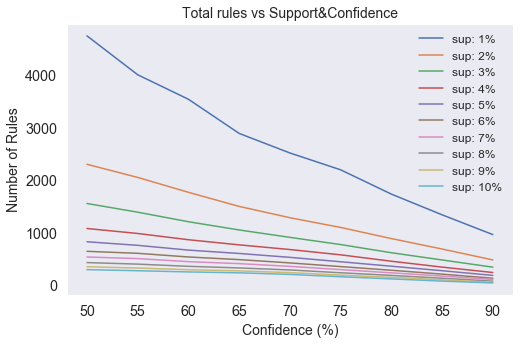

In [149]:
y = outcome_rules_number
title = 'Total rules'

rules_plot(y, title)

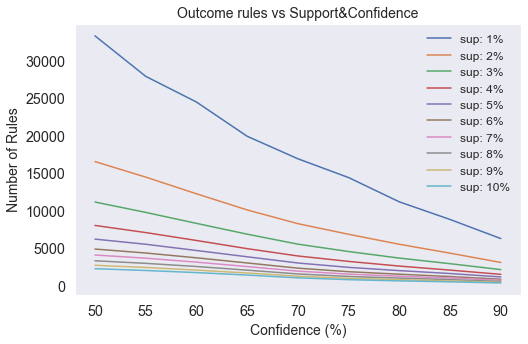

In [150]:
y = total_rules_number
title = 'Outcome rules'

rules_plot(y, title)

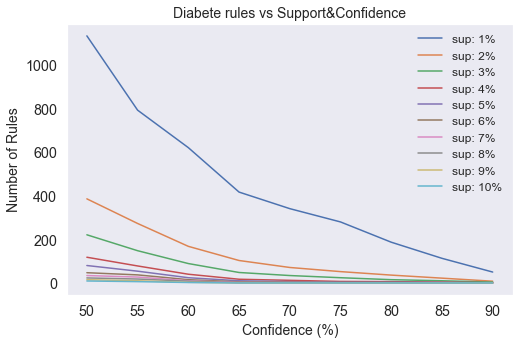

In [151]:
y = diabete_rules_number
title = 'Diabete rules'

rules_plot(y, title)